In [0]:
# import google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# this is the file path of ladder_net.py file
import os
os.chdir('/content/drive/My Drive/final_code/noisystudent-master') # root dictionary, the parent folder root of train and test folder
os.getcwd()

'/content/drive/My Drive/final_code/noisystudent-master'

In [0]:
ls

CONTRIBUTING.md          local_scripts/           proc_svhn.py
data_input.py            main.ipynb               __pycache__/
efficientnet_builder.py  main.py                  randaugment.py
efficientnet_model.py    mnist_example.py         README.md
ladder_net_dropout.py    noisystudent_svhn.ipynb  task_info.py
ladder_net.py            pic_500.xlsx             utils.py
LICENSE                  preprocessing.py


In [0]:
#Select TensorFlow 1.x
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [0]:
# Show the version of tensorflow
import tensorflow as tf
tf.__version__

'1.15.2'

In [0]:
!pip install keras==2.2.5

     |████████████████████████████████| 337kB 9.1MB/s 
  Found existing installation: Keras 2.3.1
    Uninstalling Keras-2.3.1:
      Successfully uninstalled Keras-2.3.1


In [0]:
# Find the best ratio of mnist dataset
from __future__ import print_function

from keras.datasets import mnist
import keras
import random
from sklearn.metrics import accuracy_score
import numpy as np

from ladder_net import get_ladder_network_fc

inp_size = 28*28 # size of mnist dataset 
n_classes = 10 # number of classes
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, inp_size).astype('float32')/255
x_test  = x_test.reshape(10000,  inp_size).astype('float32')/255

y_train = keras.utils.to_categorical(y_train, n_classes)
y_test  = keras.utils.to_categorical(y_test,  n_classes)

idxs_label = range(x_train.shape[0])
idxs_unlabel = range(x_train.shape[0])
# size_list is the list of the size of unlabeled data
size_list=[1,10,50,100,250,500,1000,1500,3000,5000,7500,10000,15000,20000,25000,30000,35000,40000,45000,50000,55000,59500]
acc_list=[]
labeled_size=500
for unlabel_size in size_list:
  random.seed(0)
  idxs_label = np.random.choice(x_train.shape[0], labeled_size, replace=False)
  random.seed(1)
  idxs_unlabel = np.random.choice(x_train.shape[0], unlabel_size, replace=False)
  x_train_unlabeled = x_train[idxs_unlabel]
  y_train_unlabeled = y_train[idxs_unlabel]
  x_train_labeled   = x_train[idxs_label]
  y_train_labeled   = y_train[idxs_label]
  if unlabel_size>=labeled_size:
    n_rep = x_train_unlabeled.shape[0] // x_train_labeled.shape[0]
    x_train_labeled_rep = np.concatenate([x_train_labeled]*n_rep)
    y_train_labeled_rep = np.concatenate([y_train_labeled]*n_rep)
  else:
    n_rep = x_train_labeled.shape[0] // x_train_unlabeled.shape[0]
    x_train_unlabeled_rep = np.concatenate([x_train_unlabeled]*n_rep)
    y_train_unlabeled_rep = np.concatenate([y_train_unlabeled]*n_rep)
  
  model = get_ladder_network_fc(layer_sizes=[inp_size, 1000, 500, 250, 250, 250, n_classes])

  # train the model for 10 epochs
  for _ in range(10):
      if unlabel_size>=labeled_size:
        model.fit([x_train_labeled_rep, x_train_unlabeled], y_train_labeled_rep, epochs=1)
      else:
        model.fit([x_train_labeled, x_train_unlabeled_rep], y_train_labeled, epochs=1)
      y_test_pr = model.test_model.predict(x_test, batch_size=100)
      acc=accuracy_score(y_test.argmax(-1), y_test_pr.argmax(-1))
      print("Test accuracy : %f" % acc)
  acc_list.append(acc)

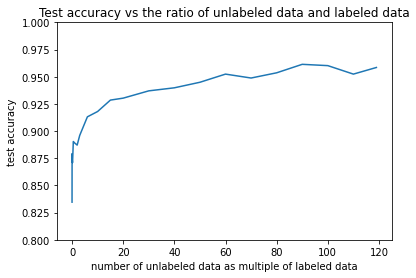

In [0]:
# plot test accuracy vs the ratio of unlabeled data and labeled data
import matplotlib.pyplot as plt
size_list_plot=np.array(size_list)
plt.plot(size_list_plot/500, acc_list)  
plt.title("Test accuracy vs the ratio of unlabeled data and labeled data")
plt.xlabel("number of unlabeled data as multiple of labeled data")
plt.ylabel("test accuracy")

plt.ylim(0.8, 1)
plt.show()  

In [0]:
# print accuracy list
print(acc_list)

[0.7407, 0.8084, 0.8477, 0.8715, 0.8735, 0.8879, 0.8754, 0.8795, 0.883, 0.8894, 0.8327, 0.8576, 0.8726, 0.8753, 0.8757, 0.88, 0.8916, 0.8808, 0.8895, 0.8828, 0.8731, 0.8839, 0.8872, 0.8946, 0.8998, 0.8991, 0.8962, 0.8964, 0.8971, 0.8996, 0.8706, 0.8748, 0.8877, 0.8974, 0.8961, 0.9005, 0.8963, 0.9052, 0.9098, 0.9076, 0.8912, 0.9031, 0.9099, 0.9173, 0.9132, 0.9242, 0.9195, 0.9252, 0.9274, 0.9324, 0.8968, 0.9141, 0.9158, 0.9281, 0.9289, 0.926, 0.9338, 0.9396, 0.9418, 0.9391, 0.9084, 0.9129, 0.9146, 0.9311, 0.9236, 0.9374, 0.9318, 0.9471, 0.9431, 0.948, 0.9072, 0.9225, 0.9279, 0.9286, 0.9445, 0.9425, 0.9453, 0.948, 0.9502, 0.9448, 0.9177, 0.9251, 0.9358, 0.938, 0.9391, 0.9457, 0.949, 0.9469, 0.9529, 0.9542, 0.9189, 0.9318, 0.9391, 0.9414, 0.9456, 0.9515, 0.9487, 0.9517, 0.951, 0.9552, 0.9058, 0.9233, 0.9297, 0.9322, 0.9431, 0.9444, 0.9522, 0.9538, 0.951, 0.9529, 0.9172, 0.9269, 0.9285, 0.9406, 0.9465, 0.9462, 0.9538, 0.9513, 0.9504, 0.9546, 0.9147, 0.9366, 0.9375, 0.9469, 0.9468, 0.9538, 0

In [0]:
# Delete all gaussian noise in the model above, find the result.
from __future__ import print_function

from keras.datasets import mnist
import keras
import random
from sklearn.metrics import accuracy_score
import numpy as np

from ladder_net import get_ladder_network_fc

inp_size = 28*28 # size of mnist dataset 
n_classes = 10
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, inp_size).astype('float32')/255
x_test  = x_test.reshape(10000,  inp_size).astype('float32')/255

y_train = keras.utils.to_categorical(y_train, n_classes)
y_test  = keras.utils.to_categorical(y_test,  n_classes)

idxs_label = range(x_train.shape[0])
idxs_unlabel = range(x_train.shape[0])

size_list=[1,10,50,100,250,500,1000,1500,3000,5000,7500,10000,15000,20000,25000,30000,35000,40000,45000,50000,55000,59500]
acc_list=[]
labeled_size=500
for unlabel_size in size_list:
  random.seed(0)
  idxs_label = np.random.choice(x_train.shape[0], labeled_size, replace=False)
  random.seed(1)
  idxs_unlabel = np.random.choice(x_train.shape[0], unlabel_size, replace=False)
  x_train_unlabeled = x_train[idxs_unlabel]
  y_train_unlabeled = y_train[idxs_unlabel]
  x_train_labeled   = x_train[idxs_label]
  y_train_labeled   = y_train[idxs_label]
  if unlabel_size>=labeled_size:
    n_rep = x_train_unlabeled.shape[0] // x_train_labeled.shape[0]
    x_train_labeled_rep = np.concatenate([x_train_labeled]*n_rep)
    y_train_labeled_rep = np.concatenate([y_train_labeled]*n_rep)
  else:
    n_rep = x_train_labeled.shape[0] // x_train_unlabeled.shape[0]
    x_train_unlabeled_rep = np.concatenate([x_train_unlabeled]*n_rep)
    y_train_unlabeled_rep = np.concatenate([y_train_unlabeled]*n_rep)
  
  model = get_ladder_network_fc(layer_sizes=[inp_size, 1000, 500, 250, 250, 250, n_classes],noise_std=0)

  # train the model for 10 epochs
  for _ in range(10):
      if unlabel_size>=labeled_size:
        model.fit([x_train_labeled_rep, x_train_unlabeled], y_train_labeled_rep, epochs=1)
      else:
        model.fit([x_train_labeled, x_train_unlabeled_rep], y_train_labeled, epochs=1)
      y_test_pr = model.test_model.predict(x_test, batch_size=100)
      acc=accuracy_score(y_test.argmax(-1), y_test_pr.argmax(-1))
      print("Test accuracy : %f" % acc)
  acc_list.append(acc)

In [0]:
# plot test accuracy vs the ratio of unlabeled data and labeled data
import matplotlib.pyplot as plt
size_list_plot=np.array(size_list)
plt.plot(size_list_plot/500, acc_list)  
plt.title("Test accuracy vs the ratio of unlabeled data and labeled data")
plt.xlabel("number of unlabeled data as multiple of labeled data")
plt.ylabel("test accuracy")

plt.ylim(0.7, 1)
plt.show()  

In [0]:
#Change the norm of the gaussian noise
from __future__ import print_function

from keras.datasets import mnist
import keras
import random
from sklearn.metrics import accuracy_score
import numpy as np

from ladder_net import get_ladder_network_fc

inp_size = 28*28 # size of mnist dataset 
n_classes = 10
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, inp_size).astype('float32')/255
x_test  = x_test.reshape(10000,  inp_size).astype('float32')/255

y_train = keras.utils.to_categorical(y_train, n_classes)
y_test  = keras.utils.to_categorical(y_test,  n_classes)

idxs_label = range(x_train.shape[0])
idxs_unlabel = range(x_train.shape[0])
# noise_list is the list of the norm of noise
noise_list=[0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5]
acc_list_noise=[]
labeled_size=500
unlabel_size=40000
random.seed(0)
idxs_label = np.random.choice(x_train.shape[0], labeled_size, replace=False)
random.seed(1)
idxs_unlabel = np.random.choice(x_train.shape[0], unlabel_size, replace=False)
x_train_unlabeled = x_train[idxs_unlabel]
y_train_unlabeled = y_train[idxs_unlabel]
x_train_labeled   = x_train[idxs_label]
y_train_labeled   = y_train[idxs_label]
if unlabel_size>=labeled_size:
  n_rep = x_train_unlabeled.shape[0] // x_train_labeled.shape[0]
  x_train_labeled_rep = np.concatenate([x_train_labeled]*n_rep)
  y_train_labeled_rep = np.concatenate([y_train_labeled]*n_rep)
else:
  n_rep = x_train_labeled.shape[0] // x_train_unlabeled.shape[0]
  x_train_unlabeled_rep = np.concatenate([x_train_unlabeled]*n_rep)
  y_train_unlabeled_rep = np.concatenate([y_train_unlabeled]*n_rep)
for noise in noise_list:  
  model = get_ladder_network_fc(layer_sizes=[inp_size, 1000, 500, 250, 250, 250, n_classes],noise_std=noise)

  # train the model for 10 epochs
  for _ in range(10):
      if unlabel_size>=labeled_size:
        model.fit([x_train_labeled_rep, x_train_unlabeled], y_train_labeled_rep, epochs=1)
      else:
        model.fit([x_train_labeled, x_train_unlabeled_rep], y_train_labeled, epochs=1)
      y_test_pr = model.test_model.predict(x_test, batch_size=100)
      acc=accuracy_score(y_test.argmax(-1), y_test_pr.argmax(-1))
      print("Test accuracy : %f" % acc)
  acc_list_noise.append(acc)  

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/1
40000/40000 [==============================] - 85s 2ms/step - loss: 1.2690 - accuracy: 0.9743
Test accuracy : 0.888700
Epoch 1/1
   96/40000 [..............................] - ETA: 1:17 - loss: 0.3493 - accuracy: 1.0000

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


40000/40000 [==============================] - 80s 2ms/step - loss: 0.3970 - accuracy: 0.9934
Test accuracy : 0.878400
Epoch 1/1
40000/40000 [==============================] - 79s 2ms/step - loss: 0.3986 - accuracy: 0.9933
Test accuracy : 0.882200
Epoch 1/1
40000/40000 [==============================] - 79s 2ms/step - loss: 0.3934 - accuracy: 0.9952
Test accuracy : 0.883500
Epoch 1/1
40000/40000 [==============================] - 79s 2ms/step - loss: 0.3905 - accuracy: 0.9959
Test accuracy : 0.889500
Epoch 1/1
40000/40000 [==============================] - 80s 2ms/step - loss: 0.3864 - accuracy: 0.9979
Test accuracy : 0.886400
Epoch 1/1
40000/40000 [==============================] - 80s 2ms/step - loss: 0.3850 - accuracy: 0.9975
Test accuracy : 0.876700
Epoch 1/1
40000/40000 [==============================] - 80s 2ms/step - loss: 0.3872 - accuracy: 0.9973
Test accuracy : 0.887100
Epoch 1/1
40000/40000 [==============================] - 80s 2ms/step - loss: 0.3824 - accuracy: 0.9989
Tes

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


40000/40000 [==============================] - 82s 2ms/step - loss: 1.2564 - accuracy: 0.9931
Test accuracy : 0.886800
Epoch 1/1
40000/40000 [==============================] - 81s 2ms/step - loss: 1.1567 - accuracy: 0.9953
Test accuracy : 0.892800
Epoch 1/1
40000/40000 [==============================] - 81s 2ms/step - loss: 1.1197 - accuracy: 0.9948
Test accuracy : 0.905300
Epoch 1/1
40000/40000 [==============================] - 81s 2ms/step - loss: 1.0967 - accuracy: 0.9968
Test accuracy : 0.908900
Epoch 1/1
40000/40000 [==============================] - 80s 2ms/step - loss: 1.0817 - accuracy: 0.9983
Test accuracy : 0.898800
Epoch 1/1
40000/40000 [==============================] - 80s 2ms/step - loss: 1.0736 - accuracy: 0.9969
Test accuracy : 0.905000
Epoch 1/1
40000/40000 [==============================] - 81s 2ms/step - loss: 1.0552 - accuracy: 0.9993
Test accuracy : 0.909400
Epoch 1/1
40000/40000 [==============================] - 81s 2ms/step - loss: 1.0557 - accuracy: 0.9979
Tes

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


40000/40000 [==============================] - 80s 2ms/step - loss: 2.6982 - accuracy: 0.9920
Test accuracy : 0.908800
Epoch 1/1
40000/40000 [==============================] - 81s 2ms/step - loss: 2.5334 - accuracy: 0.9955
Test accuracy : 0.911200
Epoch 1/1
40000/40000 [==============================] - 81s 2ms/step - loss: 2.4697 - accuracy: 0.9957
Test accuracy : 0.906200
Epoch 1/1
40000/40000 [==============================] - 81s 2ms/step - loss: 2.4279 - accuracy: 0.9973
Test accuracy : 0.910400
Epoch 1/1
40000/40000 [==============================] - 81s 2ms/step - loss: 2.3991 - accuracy: 0.9974
Test accuracy : 0.914200
Epoch 1/1
40000/40000 [==============================] - 81s 2ms/step - loss: 2.3779 - accuracy: 0.9979
Test accuracy : 0.914000
Epoch 1/1
40000/40000 [==============================] - 81s 2ms/step - loss: 2.3553 - accuracy: 0.9983
Test accuracy : 0.916700
Epoch 1/1
40000/40000 [==============================] - 81s 2ms/step - loss: 2.3256 - accuracy: 0.9991
Tes

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


40000/40000 [==============================] - 82s 2ms/step - loss: 4.5220 - accuracy: 0.9920
Test accuracy : 0.901200
Epoch 1/1
40000/40000 [==============================] - 81s 2ms/step - loss: 4.3170 - accuracy: 0.9943
Test accuracy : 0.909300
Epoch 1/1
40000/40000 [==============================] - 81s 2ms/step - loss: 4.2375 - accuracy: 0.9962
Test accuracy : 0.916500
Epoch 1/1
40000/40000 [==============================] - 81s 2ms/step - loss: 4.1722 - accuracy: 0.9959
Test accuracy : 0.906300
Epoch 1/1
40000/40000 [==============================] - 81s 2ms/step - loss: 4.1277 - accuracy: 0.9969
Test accuracy : 0.912000
Epoch 1/1
40000/40000 [==============================] - 81s 2ms/step - loss: 4.0808 - accuracy: 0.9984
Test accuracy : 0.922300
Epoch 1/1
40000/40000 [==============================] - 81s 2ms/step - loss: 4.0453 - accuracy: 0.9985
Test accuracy : 0.920600
Epoch 1/1
40000/40000 [==============================] - 81s 2ms/step - loss: 4.0241 - accuracy: 0.9980
Tes

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


40000/40000 [==============================] - 82s 2ms/step - loss: 6.6448 - accuracy: 0.9897
Test accuracy : 0.914200
Epoch 1/1
40000/40000 [==============================] - 82s 2ms/step - loss: 6.4035 - accuracy: 0.9920
Test accuracy : 0.911900
Epoch 1/1
40000/40000 [==============================] - 82s 2ms/step - loss: 6.2657 - accuracy: 0.9947
Test accuracy : 0.929800
Epoch 1/1
40000/40000 [==============================] - 82s 2ms/step - loss: 6.1699 - accuracy: 0.9952
Test accuracy : 0.930800
Epoch 1/1
40000/40000 [==============================] - 82s 2ms/step - loss: 6.0957 - accuracy: 0.9962
Test accuracy : 0.937100
Epoch 1/1
40000/40000 [==============================] - 82s 2ms/step - loss: 6.0097 - accuracy: 0.9974
Test accuracy : 0.928000
Epoch 1/1
40000/40000 [==============================] - 82s 2ms/step - loss: 5.9611 - accuracy: 0.9971
Test accuracy : 0.938700
Epoch 1/1
40000/40000 [==============================] - 82s 2ms/step - loss: 5.9197 - accuracy: 0.9979
Tes

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


40000/40000 [==============================] - 83s 2ms/step - loss: 8.9354 - accuracy: 0.9853
Test accuracy : 0.924700
Epoch 1/1
40000/40000 [==============================] - 83s 2ms/step - loss: 8.6024 - accuracy: 0.9891
Test accuracy : 0.933200
Epoch 1/1
40000/40000 [==============================] - 83s 2ms/step - loss: 8.3702 - accuracy: 0.9909
Test accuracy : 0.935000
Epoch 1/1
40000/40000 [==============================] - 82s 2ms/step - loss: 8.2660 - accuracy: 0.9919
Test accuracy : 0.938200
Epoch 1/1
40000/40000 [==============================] - 82s 2ms/step - loss: 8.1350 - accuracy: 0.9926
Test accuracy : 0.944000
Epoch 1/1
40000/40000 [==============================] - 82s 2ms/step - loss: 8.0065 - accuracy: 0.9954
Test accuracy : 0.947400
Epoch 1/1
40000/40000 [==============================] - 82s 2ms/step - loss: 7.9264 - accuracy: 0.9951
Test accuracy : 0.950100
Epoch 1/1
40000/40000 [==============================] - 82s 2ms/step - loss: 7.8583 - accuracy: 0.9952
Tes

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


40000/40000 [==============================] - 83s 2ms/step - loss: 11.2060 - accuracy: 0.9793
Test accuracy : 0.935000
Epoch 1/1
40000/40000 [==============================] - 83s 2ms/step - loss: 10.7748 - accuracy: 0.9835
Test accuracy : 0.941800
Epoch 1/1
40000/40000 [==============================] - 83s 2ms/step - loss: 10.4558 - accuracy: 0.9861
Test accuracy : 0.946400
Epoch 1/1
40000/40000 [==============================] - 83s 2ms/step - loss: 10.2566 - accuracy: 0.9877
Test accuracy : 0.948200
Epoch 1/1
40000/40000 [==============================] - 83s 2ms/step - loss: 10.1243 - accuracy: 0.9884
Test accuracy : 0.950400
Epoch 1/1
40000/40000 [==============================] - 84s 2ms/step - loss: 9.9865 - accuracy: 0.9909
Test accuracy : 0.951800
Epoch 1/1
40000/40000 [==============================] - 83s 2ms/step - loss: 9.8606 - accuracy: 0.9917
Test accuracy : 0.954700
Epoch 1/1
40000/40000 [==============================] - 83s 2ms/step - loss: 9.7527 - accuracy: 0.992

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


40000/40000 [==============================] - 83s 2ms/step - loss: 13.4188 - accuracy: 0.9670
Test accuracy : 0.938100
Epoch 1/1
40000/40000 [==============================] - 83s 2ms/step - loss: 12.8550 - accuracy: 0.9745
Test accuracy : 0.945800
Epoch 1/1
40000/40000 [==============================] - 84s 2ms/step - loss: 12.5271 - accuracy: 0.9765
Test accuracy : 0.949200
Epoch 1/1
40000/40000 [==============================] - 83s 2ms/step - loss: 12.2724 - accuracy: 0.9802
Test accuracy : 0.952700
Epoch 1/1
40000/40000 [==============================] - 83s 2ms/step - loss: 12.1051 - accuracy: 0.9819
Test accuracy : 0.954800
Epoch 1/1
40000/40000 [==============================] - 83s 2ms/step - loss: 11.9767 - accuracy: 0.9818
Test accuracy : 0.950800
Epoch 1/1
40000/40000 [==============================] - 83s 2ms/step - loss: 11.8127 - accuracy: 0.9843
Test accuracy : 0.955400
Epoch 1/1
40000/40000 [==============================] - 83s 2ms/step - loss: 11.7469 - accuracy: 0.

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


40000/40000 [==============================] - 84s 2ms/step - loss: 15.5656 - accuracy: 0.9524
Test accuracy : 0.934300
Epoch 1/1
40000/40000 [==============================] - 84s 2ms/step - loss: 14.9273 - accuracy: 0.9597
Test accuracy : 0.942900
Epoch 1/1
40000/40000 [==============================] - 85s 2ms/step - loss: 14.5543 - accuracy: 0.9627
Test accuracy : 0.947200
Epoch 1/1
40000/40000 [==============================] - 85s 2ms/step - loss: 14.2611 - accuracy: 0.9650
Test accuracy : 0.947600
Epoch 1/1
40000/40000 [==============================] - 85s 2ms/step - loss: 14.0790 - accuracy: 0.9678
Test accuracy : 0.951800
Epoch 1/1
40000/40000 [==============================] - 85s 2ms/step - loss: 13.8581 - accuracy: 0.9691
Test accuracy : 0.949600
Epoch 1/1
40000/40000 [==============================] - 85s 2ms/step - loss: 13.7603 - accuracy: 0.9714
Test accuracy : 0.953500
Epoch 1/1
40000/40000 [==============================] - 85s 2ms/step - loss: 13.5788 - accuracy: 0.

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


40000/40000 [==============================] - 86s 2ms/step - loss: 17.9176 - accuracy: 0.9276
Test accuracy : 0.940200
Epoch 1/1
40000/40000 [==============================] - 86s 2ms/step - loss: 17.1415 - accuracy: 0.9395
Test accuracy : 0.941100
Epoch 1/1
40000/40000 [==============================] - 86s 2ms/step - loss: 16.6959 - accuracy: 0.9436
Test accuracy : 0.947500
Epoch 1/1
40000/40000 [==============================] - 86s 2ms/step - loss: 16.3615 - accuracy: 0.9473
Test accuracy : 0.948300
Epoch 1/1
40000/40000 [==============================] - 85s 2ms/step - loss: 16.1402 - accuracy: 0.9509
Test accuracy : 0.955100
Epoch 1/1
40000/40000 [==============================] - 85s 2ms/step - loss: 15.9270 - accuracy: 0.9520
Test accuracy : 0.956500
Epoch 1/1
40000/40000 [==============================] - 85s 2ms/step - loss: 15.7470 - accuracy: 0.9561
Test accuracy : 0.955100
Epoch 1/1
40000/40000 [==============================] - 85s 2ms/step - loss: 15.6386 - accuracy: 0.

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


40000/40000 [==============================] - 87s 2ms/step - loss: 20.0090 - accuracy: 0.9053
Test accuracy : 0.937200
Epoch 1/1
40000/40000 [==============================] - 88s 2ms/step - loss: 19.1748 - accuracy: 0.9179
Test accuracy : 0.940100
Epoch 1/1
40000/40000 [==============================] - 87s 2ms/step - loss: 18.6983 - accuracy: 0.9216
Test accuracy : 0.944500
Epoch 1/1
40000/40000 [==============================] - 89s 2ms/step - loss: 18.3761 - accuracy: 0.9245
Test accuracy : 0.948300
Epoch 1/1
40000/40000 [==============================] - 87s 2ms/step - loss: 18.0791 - accuracy: 0.9289
Test accuracy : 0.950100
Epoch 1/1
40000/40000 [==============================] - 87s 2ms/step - loss: 17.8401 - accuracy: 0.9327
Test accuracy : 0.950700
Epoch 1/1
40000/40000 [==============================] - 87s 2ms/step - loss: 17.7737 - accuracy: 0.9359
Test accuracy : 0.949600
Epoch 1/1
40000/40000 [==============================] - 87s 2ms/step - loss: 17.5696 - accuracy: 0.

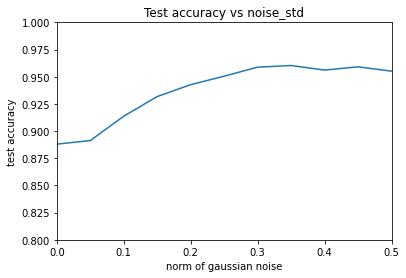

In [0]:
import matplotlib.pyplot as plt
noise_list_plot=np.array(noise_list)
plt.plot(noise_list_plot, acc_list_noise)  
plt.title("Test accuracy vs noise_std")
plt.xlabel("norm of gaussian noise")
plt.ylabel("test accuracy")

plt.ylim(0.8, 1)
plt.xlim(0, 0.5)
plt.show() 

In [0]:
print(acc_list_noise)

NameError: ignored

In [0]:
# Find the best ratio of fashion_mnist dataset, try to find out whether the different dataset has the same best ratio
from __future__ import print_function

from keras.datasets import fashion_mnist
import keras
import random
from sklearn.metrics import accuracy_score
import numpy as np

from ladder_net import get_ladder_network_fc

inp_size = 28*28 # size of fashion_mnist dataset 
n_classes = 10
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.reshape(60000, inp_size).astype('float32')/255
x_test  = x_test.reshape(10000,  inp_size).astype('float32')/255

y_train = keras.utils.to_categorical(y_train, n_classes)
y_test  = keras.utils.to_categorical(y_test,  n_classes)

idxs_label = range(x_train.shape[0])
idxs_unlabel = range(x_train.shape[0])
size_list=[1,10,50,100,250,500,1000,1500,3000,5000,7500,10000,15000,20000,25000,30000,35000,40000,45000,50000,55000,59500]
acc_list=[]
labeled_size=500
for unlabel_size in size_list:
  random.seed(0)
  idxs_label = np.random.choice(x_train.shape[0], labeled_size, replace=False)
  random.seed(1)
  idxs_unlabel = np.random.choice(x_train.shape[0], unlabel_size, replace=False)
  x_train_unlabeled = x_train[idxs_unlabel]
  y_train_unlabeled = y_train[idxs_unlabel]
  x_train_labeled   = x_train[idxs_label]
  y_train_labeled   = y_train[idxs_label]
  if unlabel_size>=labeled_size:
    n_rep = x_train_unlabeled.shape[0] // x_train_labeled.shape[0]
    x_train_labeled_rep = np.concatenate([x_train_labeled]*n_rep)
    y_train_labeled_rep = np.concatenate([y_train_labeled]*n_rep)
  else:
    n_rep = x_train_labeled.shape[0] // x_train_unlabeled.shape[0]
    x_train_unlabeled_rep = np.concatenate([x_train_unlabeled]*n_rep)
    y_train_unlabeled_rep = np.concatenate([y_train_unlabeled]*n_rep)
  
  model = get_ladder_network_fc(layer_sizes=[inp_size, 1000, 500, 250, 250, 250, n_classes])

  # train the model for 10 epochs
  for _ in range(10):
      if unlabel_size>=labeled_size:
        model.fit([x_train_labeled_rep, x_train_unlabeled], y_train_labeled_rep, epochs=1)
      else:
        model.fit([x_train_labeled, x_train_unlabeled_rep], y_train_labeled, epochs=1)
      y_test_pr = model.test_model.predict(x_test, batch_size=100)
      acc=accuracy_score(y_test.argmax(-1), y_test_pr.argmax(-1))
      print("Test accuracy : %f" % acc)
  acc_list.append(acc)

4423680/4422102 [==============================] - 1s 0us/step


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Epoch 1/1
500/500 [==============================] - 12s 24ms/step - loss: 165.5869 - accuracy: 0.4280
Test accuracy : 0.542800
Epoch 1/1
 64/500 [==>...........................] - ETA: 1s - loss: 36.6695 - accuracy: 0.4844

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


500/500 [==============================] - 1s 3ms/step - loss: 26.7833 - accuracy: 0.4760
Test accuracy : 0.591200
Epoch 1/1
500/500 [==============================] - 1s 3ms/step - loss: 20.7109 - accuracy: 0.5020
Test accuracy : 0.593000
Epoch 1/1
500/500 [==============================] - 1s 3ms/step - loss: 15.9613 - accuracy: 0.5320
Test accuracy : 0.619900
Epoch 1/1
500/500 [==============================] - 1s 3ms/step - loss: 11.0497 - accuracy: 0.5600
Test accuracy : 0.641500
Epoch 1/1
500/500 [==============================] - 1s 3ms/step - loss: 7.1200 - accuracy: 0.5740
Test accuracy : 0.650600
Epoch 1/1
500/500 [==============================] - 1s 3ms/step - loss: 4.7716 - accuracy: 0.5460
Test accuracy : 0.639300
Epoch 1/1
500/500 [==============================] - 1s 3ms/step - loss: 3.2520 - accuracy: 0.5720
Test accuracy : 0.636000
Epoch 1/1
500/500 [==============================] - 1s 3ms/step - loss: 2.4700 - accuracy: 0.5320
Test accuracy : 0.655700
Epoch 1/1
500/

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


500/500 [==============================] - 1s 3ms/step - loss: 22.1532 - accuracy: 0.6600
Test accuracy : 0.695200
Epoch 1/1
500/500 [==============================] - 1s 3ms/step - loss: 15.7844 - accuracy: 0.7080
Test accuracy : 0.692500
Epoch 1/1
500/500 [==============================] - 1s 3ms/step - loss: 10.3628 - accuracy: 0.7160
Test accuracy : 0.714400
Epoch 1/1
500/500 [==============================] - 1s 3ms/step - loss: 7.0597 - accuracy: 0.7360
Test accuracy : 0.720600
Epoch 1/1
500/500 [==============================] - 1s 2ms/step - loss: 6.8535 - accuracy: 0.7700
Test accuracy : 0.729800
Epoch 1/1
500/500 [==============================] - 1s 3ms/step - loss: 5.2883 - accuracy: 0.7180
Test accuracy : 0.725900
Epoch 1/1
500/500 [==============================] - 1s 3ms/step - loss: 5.3675 - accuracy: 0.7580
Test accuracy : 0.732300
Epoch 1/1
500/500 [==============================] - 1s 3ms/step - loss: 5.7372 - accuracy: 0.7840
Test accuracy : 0.754000
Epoch 1/1
500/5

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


500/500 [==============================] - 1s 3ms/step - loss: 29.8437 - accuracy: 0.6160
Test accuracy : 0.661500
Epoch 1/1
500/500 [==============================] - 1s 3ms/step - loss: 23.8357 - accuracy: 0.6940
Test accuracy : 0.674500
Epoch 1/1
500/500 [==============================] - 1s 3ms/step - loss: 19.6843 - accuracy: 0.7040
Test accuracy : 0.686200
Epoch 1/1
500/500 [==============================] - 1s 3ms/step - loss: 17.2976 - accuracy: 0.7140
Test accuracy : 0.680900
Epoch 1/1
500/500 [==============================] - 1s 3ms/step - loss: 15.1295 - accuracy: 0.7020
Test accuracy : 0.695600
Epoch 1/1
500/500 [==============================] - 1s 3ms/step - loss: 13.3499 - accuracy: 0.7080
Test accuracy : 0.692600
Epoch 1/1
500/500 [==============================] - 1s 3ms/step - loss: 12.1985 - accuracy: 0.7260
Test accuracy : 0.700400
Epoch 1/1
500/500 [==============================] - 1s 3ms/step - loss: 11.0985 - accuracy: 0.7560
Test accuracy : 0.708900
Epoch 1/1


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


500/500 [==============================] - 1s 3ms/step - loss: 32.5128 - accuracy: 0.6660
Test accuracy : 0.691400
Epoch 1/1
500/500 [==============================] - 1s 3ms/step - loss: 26.7611 - accuracy: 0.7160
Test accuracy : 0.725100
Epoch 1/1
500/500 [==============================] - 1s 3ms/step - loss: 22.3195 - accuracy: 0.7180
Test accuracy : 0.721500
Epoch 1/1
500/500 [==============================] - 1s 3ms/step - loss: 19.6936 - accuracy: 0.6980
Test accuracy : 0.722600
Epoch 1/1
500/500 [==============================] - 1s 3ms/step - loss: 18.7207 - accuracy: 0.7740
Test accuracy : 0.717200
Epoch 1/1
500/500 [==============================] - 1s 3ms/step - loss: 17.7652 - accuracy: 0.7460
Test accuracy : 0.741400
Epoch 1/1
500/500 [==============================] - 1s 3ms/step - loss: 16.7399 - accuracy: 0.7700
Test accuracy : 0.732200
Epoch 1/1
500/500 [==============================] - 1s 3ms/step - loss: 15.9396 - accuracy: 0.7860
Test accuracy : 0.744200
Epoch 1/1


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


500/500 [==============================] - 1s 3ms/step - loss: 32.0119 - accuracy: 0.6680
Test accuracy : 0.704200
Epoch 1/1
500/500 [==============================] - 1s 3ms/step - loss: 26.8897 - accuracy: 0.7200
Test accuracy : 0.694900
Epoch 1/1
500/500 [==============================] - 1s 3ms/step - loss: 23.1924 - accuracy: 0.7380
Test accuracy : 0.725800
Epoch 1/1
500/500 [==============================] - 1s 3ms/step - loss: 21.5141 - accuracy: 0.7480
Test accuracy : 0.733900
Epoch 1/1
500/500 [==============================] - 1s 3ms/step - loss: 21.0141 - accuracy: 0.7700
Test accuracy : 0.729600
Epoch 1/1
500/500 [==============================] - 1s 3ms/step - loss: 19.5937 - accuracy: 0.7780
Test accuracy : 0.745700
Epoch 1/1
500/500 [==============================] - 1s 3ms/step - loss: 18.9071 - accuracy: 0.7980
Test accuracy : 0.737600
Epoch 1/1
500/500 [==============================] - 1s 3ms/step - loss: 19.0800 - accuracy: 0.7920
Test accuracy : 0.739100
Epoch 1/1


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


500/500 [==============================] - 1s 3ms/step - loss: 32.8450 - accuracy: 0.6240
Test accuracy : 0.690100
Epoch 1/1
500/500 [==============================] - 1s 3ms/step - loss: 27.2171 - accuracy: 0.6300
Test accuracy : 0.698300
Epoch 1/1
500/500 [==============================] - 1s 3ms/step - loss: 23.7510 - accuracy: 0.6640
Test accuracy : 0.707700
Epoch 1/1
500/500 [==============================] - 1s 3ms/step - loss: 22.2932 - accuracy: 0.6920
Test accuracy : 0.708600
Epoch 1/1
500/500 [==============================] - 1s 3ms/step - loss: 20.9127 - accuracy: 0.7020
Test accuracy : 0.733900
Epoch 1/1
500/500 [==============================] - 1s 3ms/step - loss: 20.8835 - accuracy: 0.7100
Test accuracy : 0.719900
Epoch 1/1
500/500 [==============================] - 1s 3ms/step - loss: 20.3827 - accuracy: 0.7460
Test accuracy : 0.740000
Epoch 1/1
500/500 [==============================] - 1s 3ms/step - loss: 20.2486 - accuracy: 0.7200
Test accuracy : 0.741400
Epoch 1/1


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


1000/1000 [==============================] - 3s 3ms/step - loss: 25.1906 - accuracy: 0.6960
Test accuracy : 0.718500
Epoch 1/1
1000/1000 [==============================] - 3s 3ms/step - loss: 21.6980 - accuracy: 0.7220
Test accuracy : 0.729400
Epoch 1/1
1000/1000 [==============================] - 3s 3ms/step - loss: 20.5665 - accuracy: 0.7610
Test accuracy : 0.729400
Epoch 1/1
1000/1000 [==============================] - 3s 3ms/step - loss: 20.0132 - accuracy: 0.7640
Test accuracy : 0.747100
Epoch 1/1
1000/1000 [==============================] - 3s 3ms/step - loss: 19.5088 - accuracy: 0.8020
Test accuracy : 0.740500
Epoch 1/1
1000/1000 [==============================] - 3s 3ms/step - loss: 18.8427 - accuracy: 0.7890
Test accuracy : 0.758000
Epoch 1/1
1000/1000 [==============================] - 3s 3ms/step - loss: 18.7084 - accuracy: 0.8190
Test accuracy : 0.768100
Epoch 1/1
1000/1000 [==============================] - 3s 3ms/step - loss: 18.0314 - accuracy: 0.8220
Test accuracy : 0.7

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


1500/1500 [==============================] - 4s 3ms/step - loss: 22.8303 - accuracy: 0.7220
Test accuracy : 0.727400
Epoch 1/1
1500/1500 [==============================] - 4s 3ms/step - loss: 21.0166 - accuracy: 0.7647
Test accuracy : 0.733800
Epoch 1/1
1500/1500 [==============================] - 4s 3ms/step - loss: 20.0312 - accuracy: 0.7880
Test accuracy : 0.740900
Epoch 1/1
1500/1500 [==============================] - 4s 3ms/step - loss: 19.0119 - accuracy: 0.8173
Test accuracy : 0.771900
Epoch 1/1
1500/1500 [==============================] - 4s 3ms/step - loss: 18.4271 - accuracy: 0.8387
Test accuracy : 0.754900
Epoch 1/1
1500/1500 [==============================] - 4s 3ms/step - loss: 17.6580 - accuracy: 0.8460
Test accuracy : 0.773400
Epoch 1/1
1500/1500 [==============================] - 4s 3ms/step - loss: 17.3237 - accuracy: 0.8500
Test accuracy : 0.772900
Epoch 1/1
1500/1500 [==============================] - 4s 3ms/step - loss: 16.8449 - accuracy: 0.8687
Test accuracy : 0.7

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


3000/3000 [==============================] - 8s 3ms/step - loss: 20.6817 - accuracy: 0.7663
Test accuracy : 0.753000
Epoch 1/1
3000/3000 [==============================] - 8s 3ms/step - loss: 19.3318 - accuracy: 0.8060
Test accuracy : 0.757500
Epoch 1/1
3000/3000 [==============================] - 8s 3ms/step - loss: 18.0164 - accuracy: 0.8287
Test accuracy : 0.763800
Epoch 1/1
3000/3000 [==============================] - 8s 3ms/step - loss: 17.2737 - accuracy: 0.8607
Test accuracy : 0.773600
Epoch 1/1
3000/3000 [==============================] - 8s 3ms/step - loss: 16.7405 - accuracy: 0.8727
Test accuracy : 0.773600
Epoch 1/1
3000/3000 [==============================] - 8s 3ms/step - loss: 16.3810 - accuracy: 0.8873
Test accuracy : 0.775300
Epoch 1/1
3000/3000 [==============================] - 8s 3ms/step - loss: 15.9769 - accuracy: 0.8857
Test accuracy : 0.785800
Epoch 1/1
3000/3000 [==============================] - 8s 3ms/step - loss: 15.5345 - accuracy: 0.9083
Test accuracy : 0.7

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


5000/5000 [==============================] - 14s 3ms/step - loss: 19.0310 - accuracy: 0.8106
Test accuracy : 0.758900
Epoch 1/1
5000/5000 [==============================] - 14s 3ms/step - loss: 17.4929 - accuracy: 0.8576
Test accuracy : 0.758400
Epoch 1/1
5000/5000 [==============================] - 14s 3ms/step - loss: 16.5486 - accuracy: 0.8858
Test accuracy : 0.764200
Epoch 1/1
5000/5000 [==============================] - 14s 3ms/step - loss: 15.8829 - accuracy: 0.8832
Test accuracy : 0.758800
Epoch 1/1
5000/5000 [==============================] - 14s 3ms/step - loss: 15.5504 - accuracy: 0.9042
Test accuracy : 0.755700
Epoch 1/1
5000/5000 [==============================] - 14s 3ms/step - loss: 15.2658 - accuracy: 0.9122
Test accuracy : 0.759500
Epoch 1/1
5000/5000 [==============================] - 13s 3ms/step - loss: 14.8963 - accuracy: 0.9274
Test accuracy : 0.768100
Epoch 1/1
5000/5000 [==============================] - 13s 3ms/step - loss: 15.0012 - accuracy: 0.9232
Test accura

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


7500/7500 [==============================] - 21s 3ms/step - loss: 17.7962 - accuracy: 0.8344
Test accuracy : 0.781900
Epoch 1/1
7500/7500 [==============================] - 20s 3ms/step - loss: 16.4546 - accuracy: 0.8796
Test accuracy : 0.780900
Epoch 1/1
7500/7500 [==============================] - 20s 3ms/step - loss: 15.7857 - accuracy: 0.8891
Test accuracy : 0.787400
Epoch 1/1
7500/7500 [==============================] - 21s 3ms/step - loss: 15.2602 - accuracy: 0.9133
Test accuracy : 0.796200
Epoch 1/1
7500/7500 [==============================] - 20s 3ms/step - loss: 14.8294 - accuracy: 0.9176
Test accuracy : 0.783800
Epoch 1/1
7500/7500 [==============================] - 20s 3ms/step - loss: 14.5899 - accuracy: 0.9220
Test accuracy : 0.793400
Epoch 1/1
7500/7500 [==============================] - 20s 3ms/step - loss: 14.5522 - accuracy: 0.9328
Test accuracy : 0.794400
Epoch 1/1
7500/7500 [==============================] - 20s 3ms/step - loss: 14.2882 - accuracy: 0.9372
Test accura

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


10000/10000 [==============================] - 28s 3ms/step - loss: 16.9628 - accuracy: 0.8669
Test accuracy : 0.773800
Epoch 1/1
10000/10000 [==============================] - 28s 3ms/step - loss: 15.8603 - accuracy: 0.8977
Test accuracy : 0.776800
Epoch 1/1
10000/10000 [==============================] - 28s 3ms/step - loss: 15.1157 - accuracy: 0.9187
Test accuracy : 0.775700
Epoch 1/1
10000/10000 [==============================] - 28s 3ms/step - loss: 14.9651 - accuracy: 0.9276
Test accuracy : 0.777800
Epoch 1/1
10000/10000 [==============================] - 27s 3ms/step - loss: 14.4878 - accuracy: 0.9327
Test accuracy : 0.785200
Epoch 1/1
10000/10000 [==============================] - 28s 3ms/step - loss: 14.2926 - accuracy: 0.9453
Test accuracy : 0.781600
Epoch 1/1
10000/10000 [==============================] - 28s 3ms/step - loss: 14.2031 - accuracy: 0.9475
Test accuracy : 0.786200
Epoch 1/1
10000/10000 [==============================] - 28s 3ms/step - loss: 14.0613 - accuracy: 0.

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


15000/15000 [==============================] - 42s 3ms/step - loss: 16.0123 - accuracy: 0.8993
Test accuracy : 0.764500
Epoch 1/1
15000/15000 [==============================] - 43s 3ms/step - loss: 15.0970 - accuracy: 0.9258
Test accuracy : 0.773800
Epoch 1/1
15000/15000 [==============================] - 43s 3ms/step - loss: 14.6885 - accuracy: 0.9356
Test accuracy : 0.782300
Epoch 1/1
15000/15000 [==============================] - 42s 3ms/step - loss: 14.3598 - accuracy: 0.9467
Test accuracy : 0.786400
Epoch 1/1
15000/15000 [==============================] - 43s 3ms/step - loss: 14.1104 - accuracy: 0.9543
Test accuracy : 0.781500
Epoch 1/1
15000/15000 [==============================] - 42s 3ms/step - loss: 13.8905 - accuracy: 0.9561
Test accuracy : 0.778100
Epoch 1/1
15000/15000 [==============================] - 42s 3ms/step - loss: 13.7590 - accuracy: 0.9590
Test accuracy : 0.772200
Epoch 1/1
15000/15000 [==============================] - 42s 3ms/step - loss: 13.5526 - accuracy: 0.

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


20000/20000 [==============================] - 56s 3ms/step - loss: 15.5114 - accuracy: 0.9186
Test accuracy : 0.782100
Epoch 1/1
20000/20000 [==============================] - 57s 3ms/step - loss: 14.7318 - accuracy: 0.9399
Test accuracy : 0.786400
Epoch 1/1
20000/20000 [==============================] - 56s 3ms/step - loss: 14.3267 - accuracy: 0.9464
Test accuracy : 0.788200
Epoch 1/1
20000/20000 [==============================] - 56s 3ms/step - loss: 14.0700 - accuracy: 0.9521
Test accuracy : 0.786500
Epoch 1/1
20000/20000 [==============================] - 56s 3ms/step - loss: 13.9150 - accuracy: 0.9547
Test accuracy : 0.784700
Epoch 1/1
20000/20000 [==============================] - 57s 3ms/step - loss: 13.6743 - accuracy: 0.9612
Test accuracy : 0.795100
Epoch 1/1
20000/20000 [==============================] - 56s 3ms/step - loss: 13.5224 - accuracy: 0.9625
Test accuracy : 0.794800
Epoch 1/1
20000/20000 [==============================] - 57s 3ms/step - loss: 13.4034 - accuracy: 0.

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


25000/25000 [==============================] - 70s 3ms/step - loss: 15.3050 - accuracy: 0.9188
Test accuracy : 0.776500
Epoch 1/1
25000/25000 [==============================] - 70s 3ms/step - loss: 14.5501 - accuracy: 0.9352
Test accuracy : 0.786300
Epoch 1/1
25000/25000 [==============================] - 70s 3ms/step - loss: 14.1927 - accuracy: 0.9492
Test accuracy : 0.785800
Epoch 1/1
25000/25000 [==============================] - 70s 3ms/step - loss: 13.9200 - accuracy: 0.9549
Test accuracy : 0.790600
Epoch 1/1
25000/25000 [==============================] - 70s 3ms/step - loss: 13.6390 - accuracy: 0.9562
Test accuracy : 0.795600
Epoch 1/1
25000/25000 [==============================] - 70s 3ms/step - loss: 13.4098 - accuracy: 0.9621
Test accuracy : 0.794600
Epoch 1/1
25000/25000 [==============================] - 69s 3ms/step - loss: 13.4096 - accuracy: 0.9626
Test accuracy : 0.790800
Epoch 1/1
25000/25000 [==============================] - 70s 3ms/step - loss: 13.2827 - accuracy: 0.

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


30000/30000 [==============================] - 85s 3ms/step - loss: 14.9583 - accuracy: 0.9271
Test accuracy : 0.779500
Epoch 1/1
30000/30000 [==============================] - 85s 3ms/step - loss: 14.2757 - accuracy: 0.9448
Test accuracy : 0.775300
Epoch 1/1
30000/30000 [==============================] - 84s 3ms/step - loss: 13.9623 - accuracy: 0.9528
Test accuracy : 0.784700
Epoch 1/1
30000/30000 [==============================] - 85s 3ms/step - loss: 13.7011 - accuracy: 0.9560
Test accuracy : 0.778100
Epoch 1/1
30000/30000 [==============================] - 85s 3ms/step - loss: 13.4625 - accuracy: 0.9621
Test accuracy : 0.793800
Epoch 1/1
30000/30000 [==============================] - 85s 3ms/step - loss: 13.3318 - accuracy: 0.9642
Test accuracy : 0.793600
Epoch 1/1
30000/30000 [==============================] - 85s 3ms/step - loss: 13.2093 - accuracy: 0.9676
Test accuracy : 0.796900
Epoch 1/1
30000/30000 [==============================] - 85s 3ms/step - loss: 13.0604 - accuracy: 0.

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


35000/35000 [==============================] - 99s 3ms/step - loss: 14.6919 - accuracy: 0.9374
Test accuracy : 0.762500
Epoch 1/1
35000/35000 [==============================] - 100s 3ms/step - loss: 14.0799 - accuracy: 0.9519
Test accuracy : 0.774900
Epoch 1/1
35000/35000 [==============================] - 99s 3ms/step - loss: 13.7538 - accuracy: 0.9580
Test accuracy : 0.783400
Epoch 1/1
35000/35000 [==============================] - 101s 3ms/step - loss: 13.4547 - accuracy: 0.9631
Test accuracy : 0.771000
Epoch 1/1
35000/35000 [==============================] - 101s 3ms/step - loss: 13.2639 - accuracy: 0.9665
Test accuracy : 0.792000
Epoch 1/1
35000/35000 [==============================] - 102s 3ms/step - loss: 13.0850 - accuracy: 0.9704
Test accuracy : 0.791000
Epoch 1/1
35000/35000 [==============================] - 101s 3ms/step - loss: 13.0109 - accuracy: 0.9706
Test accuracy : 0.791400
Epoch 1/1
35000/35000 [==============================] - 99s 3ms/step - loss: 12.9000 - accurac

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


40000/40000 [==============================] - 115s 3ms/step - loss: 14.5251 - accuracy: 0.9426
Test accuracy : 0.782700
Epoch 1/1
40000/40000 [==============================] - 114s 3ms/step - loss: 14.0149 - accuracy: 0.9519
Test accuracy : 0.789700
Epoch 1/1
40000/40000 [==============================] - 115s 3ms/step - loss: 13.5939 - accuracy: 0.9622
Test accuracy : 0.789300
Epoch 1/1
40000/40000 [==============================] - 115s 3ms/step - loss: 13.3508 - accuracy: 0.9669
Test accuracy : 0.789400
Epoch 1/1
40000/40000 [==============================] - 115s 3ms/step - loss: 13.1593 - accuracy: 0.9689
Test accuracy : 0.791200
Epoch 1/1
40000/40000 [==============================] - 114s 3ms/step - loss: 13.0795 - accuracy: 0.9716
Test accuracy : 0.796200
Epoch 1/1
40000/40000 [==============================] - 115s 3ms/step - loss: 12.8821 - accuracy: 0.9740
Test accuracy : 0.790600
Epoch 1/1
40000/40000 [==============================] - 114s 3ms/step - loss: 12.8236 - accu

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


45000/45000 [==============================] - 129s 3ms/step - loss: 14.4698 - accuracy: 0.9434
Test accuracy : 0.774400
Epoch 1/1
45000/45000 [==============================] - 130s 3ms/step - loss: 13.8634 - accuracy: 0.9561
Test accuracy : 0.785300
Epoch 1/1
45000/45000 [==============================] - 130s 3ms/step - loss: 13.5289 - accuracy: 0.9615
Test accuracy : 0.787200
Epoch 1/1
45000/45000 [==============================] - 130s 3ms/step - loss: 13.2918 - accuracy: 0.9667
Test accuracy : 0.791100
Epoch 1/1
45000/45000 [==============================] - 130s 3ms/step - loss: 13.0978 - accuracy: 0.9708
Test accuracy : 0.788600
Epoch 1/1
45000/45000 [==============================] - 130s 3ms/step - loss: 12.9824 - accuracy: 0.9736
Test accuracy : 0.797300
Epoch 1/1
45000/45000 [==============================] - 130s 3ms/step - loss: 12.8577 - accuracy: 0.9743
Test accuracy : 0.797100
Epoch 1/1
45000/45000 [==============================] - 130s 3ms/step - loss: 12.7459 - accu

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


50000/50000 [==============================] - 150s 3ms/step - loss: 14.3301 - accuracy: 0.9435
Test accuracy : 0.781000
Epoch 1/1
50000/50000 [==============================] - 150s 3ms/step - loss: 13.7657 - accuracy: 0.9541
Test accuracy : 0.789000
Epoch 1/1
50000/50000 [==============================] - 147s 3ms/step - loss: 13.4580 - accuracy: 0.9603
Test accuracy : 0.797300
Epoch 1/1
50000/50000 [==============================] - 146s 3ms/step - loss: 13.2084 - accuracy: 0.9662
Test accuracy : 0.802200
Epoch 1/1
50000/50000 [==============================] - 146s 3ms/step - loss: 13.0197 - accuracy: 0.9690
Test accuracy : 0.799900
Epoch 1/1
50000/50000 [==============================] - 146s 3ms/step - loss: 12.9191 - accuracy: 0.9725
Test accuracy : 0.796600
Epoch 1/1
50000/50000 [==============================] - 146s 3ms/step - loss: 12.8298 - accuracy: 0.9743
Test accuracy : 0.801700
Epoch 1/1
50000/50000 [==============================] - 146s 3ms/step - loss: 12.6885 - accu

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


55000/55000 [==============================] - 160s 3ms/step - loss: 14.2246 - accuracy: 0.9502
Test accuracy : 0.793000
Epoch 1/1
55000/55000 [==============================] - 161s 3ms/step - loss: 13.6859 - accuracy: 0.9610
Test accuracy : 0.799900
Epoch 1/1
55000/55000 [==============================] - 161s 3ms/step - loss: 13.3022 - accuracy: 0.9670
Test accuracy : 0.802400
Epoch 1/1
55000/55000 [==============================] - 162s 3ms/step - loss: 13.1389 - accuracy: 0.9727
Test accuracy : 0.807700
Epoch 1/1
55000/55000 [==============================] - 161s 3ms/step - loss: 12.9435 - accuracy: 0.9751
Test accuracy : 0.810300
Epoch 1/1
55000/55000 [==============================] - 162s 3ms/step - loss: 12.8238 - accuracy: 0.9770
Test accuracy : 0.809200
Epoch 1/1
55000/55000 [==============================] - 161s 3ms/step - loss: 12.7418 - accuracy: 0.9793
Test accuracy : 0.814300
Epoch 1/1
55000/55000 [==============================] - 162s 3ms/step - loss: 12.6332 - accu

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


59500/59500 [==============================] - 178s 3ms/step - loss: 14.1212 - accuracy: 0.9498
Test accuracy : 0.791800
Epoch 1/1
59500/59500 [==============================] - 183s 3ms/step - loss: 13.6273 - accuracy: 0.9611
Test accuracy : 0.788600
Epoch 1/1
59500/59500 [==============================] - 179s 3ms/step - loss: 13.2842 - accuracy: 0.9667
Test accuracy : 0.786100
Epoch 1/1
59500/59500 [==============================] - 177s 3ms/step - loss: 13.0564 - accuracy: 0.9705
Test accuracy : 0.796000
Epoch 1/1
59500/59500 [==============================] - 177s 3ms/step - loss: 12.8713 - accuracy: 0.9746
Test accuracy : 0.785000
Epoch 1/1
59500/59500 [==============================] - 177s 3ms/step - loss: 12.7427 - accuracy: 0.9776
Test accuracy : 0.778600
Epoch 1/1
59500/59500 [==============================] - 176s 3ms/step - loss: 12.6282 - accuracy: 0.9785
Test accuracy : 0.786400
Epoch 1/1
59500/59500 [==============================] - 176s 3ms/step - loss: 12.5753 - accu

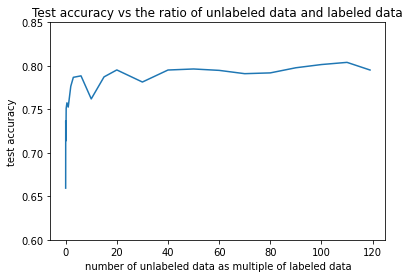

[0.6594, 0.7367, 0.7138, 0.7511, 0.7575, 0.7526, 0.7765, 0.7868, 0.7885, 0.762, 0.7873, 0.7953, 0.7814, 0.7952, 0.7964, 0.7948, 0.791, 0.7919, 0.7978, 0.8015, 0.804, 0.7952]


In [0]:
import matplotlib.pyplot as plt
size_list_plot=np.array(size_list)
plt.plot(size_list_plot/500, acc_list)  
plt.title("Test accuracy vs the ratio of unlabeled data and labeled data")
plt.xlabel("number of unlabeled data as multiple of labeled data")
plt.ylabel("test accuracy")

plt.ylim(0.6, 0.85)
plt.show() 
print(acc_list)

In [0]:
# Find the best ratio of mnist dataset, select labeled_size=100
from __future__ import print_function

from keras.datasets import mnist
import keras
import random
from sklearn.metrics import accuracy_score
import numpy as np

from ladder_net import get_ladder_network_fc

inp_size = 28*28 # size of mnist dataset 
n_classes = 10 # number of classes
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, inp_size).astype('float32')/255
x_test  = x_test.reshape(10000,  inp_size).astype('float32')/255

y_train = keras.utils.to_categorical(y_train, n_classes)
y_test  = keras.utils.to_categorical(y_test,  n_classes)

idxs_label = range(x_train.shape[0])
idxs_unlabel = range(x_train.shape[0])
# size_list is the list of the size of unlabeled data
size_list=[1,10,50,100,200,500,1000,2000,3000,5000,7000,8000,8500,9000,9500,10000,12000,15000]
acc_list=[]
labeled_size=100
for unlabel_size in size_list:
  random.seed(0)
  idxs_label = np.random.choice(x_train.shape[0], labeled_size, replace=False)
  random.seed(1)
  idxs_unlabel = np.random.choice(x_train.shape[0], unlabel_size, replace=False)
  x_train_unlabeled = x_train[idxs_unlabel]
  y_train_unlabeled = y_train[idxs_unlabel]
  x_train_labeled   = x_train[idxs_label]
  y_train_labeled   = y_train[idxs_label]
  if unlabel_size>=labeled_size:
    n_rep = x_train_unlabeled.shape[0] // x_train_labeled.shape[0]
    x_train_labeled_rep = np.concatenate([x_train_labeled]*n_rep)
    y_train_labeled_rep = np.concatenate([y_train_labeled]*n_rep)
  else:
    n_rep = x_train_labeled.shape[0] // x_train_unlabeled.shape[0]
    x_train_unlabeled_rep = np.concatenate([x_train_unlabeled]*n_rep)
    y_train_unlabeled_rep = np.concatenate([y_train_unlabeled]*n_rep)
  
  model = get_ladder_network_fc(layer_sizes=[inp_size, 1000, 500, 250, 250, 250, n_classes])

  # train the model for 20 epochs
  for _ in range(20):
      if unlabel_size>=labeled_size:
        model.fit([x_train_labeled_rep, x_train_unlabeled], y_train_labeled_rep, epochs=1)
      else:
        model.fit([x_train_labeled, x_train_unlabeled_rep], y_train_labeled, epochs=1)
      y_test_pr = model.test_model.predict(x_test, batch_size=100)
      acc=accuracy_score(y_test.argmax(-1), y_test_pr.argmax(-1))
      print("Test accuracy : %f" % acc)
  acc_list.append(acc)

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Epoch 1/1
100/100 [==============================] - 5s 45ms/step - loss: 71.7872 - accuracy: 0.2100
Test accuracy : 0.597900
Epoch 1/1
100/100 [==============================] - 0s 2ms/step - loss: 40.2806 - accuracy: 0.6300


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Test accuracy : 0.646100
Epoch 1/1
100/100 [==============================] - 0s 2ms/step - loss: 22.2074 - accuracy: 0.7500
Test accuracy : 0.685800
Epoch 1/1
100/100 [==============================] - 0s 2ms/step - loss: 12.5059 - accuracy: 0.7600
Test accuracy : 0.672900
Epoch 1/1
100/100 [==============================] - 0s 2ms/step - loss: 7.8412 - accuracy: 0.8400
Test accuracy : 0.674100
Epoch 1/1
100/100 [==============================] - 0s 2ms/step - loss: 6.3398 - accuracy: 0.8100
Test accuracy : 0.669000
Epoch 1/1
100/100 [==============================] - 0s 2ms/step - loss: 5.9648 - accuracy: 0.7600
Test accuracy : 0.672400
Epoch 1/1
100/100 [==============================] - 0s 1ms/step - loss: 5.7165 - accuracy: 0.7800
Test accuracy : 0.688000
Epoch 1/1
100/100 [==============================] - 0s 2ms/step - loss: 5.3897 - accuracy: 0.8000
Test accuracy : 0.697800
Epoch 1/1
100/100 [==============================] - 0s 2ms/step - loss: 4.9410 - accuracy: 0.7900
Test a

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Test accuracy : 0.637300
Epoch 1/1
100/100 [==============================] - 0s 2ms/step - loss: 27.9655 - accuracy: 0.7000
Test accuracy : 0.663400
Epoch 1/1
100/100 [==============================] - 0s 2ms/step - loss: 19.3496 - accuracy: 0.6900
Test accuracy : 0.670800
Epoch 1/1
100/100 [==============================] - 0s 2ms/step - loss: 16.8614 - accuracy: 0.8100
Test accuracy : 0.689300
Epoch 1/1
100/100 [==============================] - 0s 2ms/step - loss: 16.0542 - accuracy: 0.7900
Test accuracy : 0.720800
Epoch 1/1
100/100 [==============================] - 0s 2ms/step - loss: 15.2221 - accuracy: 0.8200
Test accuracy : 0.729400
Epoch 1/1
100/100 [==============================] - 0s 2ms/step - loss: 14.6724 - accuracy: 0.8200
Test accuracy : 0.729100
Epoch 1/1
100/100 [==============================] - 0s 2ms/step - loss: 14.3195 - accuracy: 0.8200
Test accuracy : 0.735500
Epoch 1/1
100/100 [==============================] - 0s 2ms/step - loss: 12.8535 - accuracy: 0.8600


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Test accuracy : 0.627300
Epoch 1/1
100/100 [==============================] - 0s 2ms/step - loss: 40.5564 - accuracy: 0.6700
Test accuracy : 0.632100
Epoch 1/1
100/100 [==============================] - 0s 2ms/step - loss: 29.3637 - accuracy: 0.6700
Test accuracy : 0.676600
Epoch 1/1
100/100 [==============================] - 0s 2ms/step - loss: 25.6881 - accuracy: 0.7200
Test accuracy : 0.680100
Epoch 1/1
100/100 [==============================] - 0s 2ms/step - loss: 24.5043 - accuracy: 0.7600
Test accuracy : 0.698400
Epoch 1/1
100/100 [==============================] - 0s 2ms/step - loss: 23.9385 - accuracy: 0.7200
Test accuracy : 0.699200
Epoch 1/1
100/100 [==============================] - 0s 2ms/step - loss: 23.1635 - accuracy: 0.7900
Test accuracy : 0.713300
Epoch 1/1
100/100 [==============================] - 0s 2ms/step - loss: 22.0753 - accuracy: 0.7900
Test accuracy : 0.710000
Epoch 1/1
100/100 [==============================] - 0s 2ms/step - loss: 21.4531 - accuracy: 0.8300


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Test accuracy : 0.692400
Epoch 1/1
100/100 [==============================] - 0s 2ms/step - loss: 41.0337 - accuracy: 0.7900
Test accuracy : 0.697600
Epoch 1/1
100/100 [==============================] - 0s 2ms/step - loss: 30.5735 - accuracy: 0.8400
Test accuracy : 0.684600
Epoch 1/1
100/100 [==============================] - 0s 2ms/step - loss: 27.2445 - accuracy: 0.7900
Test accuracy : 0.711300
Epoch 1/1
100/100 [==============================] - 0s 2ms/step - loss: 25.8206 - accuracy: 0.8300
Test accuracy : 0.721700
Epoch 1/1
100/100 [==============================] - 0s 2ms/step - loss: 25.0966 - accuracy: 0.7900
Test accuracy : 0.731700
Epoch 1/1
100/100 [==============================] - 0s 2ms/step - loss: 24.5557 - accuracy: 0.8700
Test accuracy : 0.724900
Epoch 1/1
100/100 [==============================] - 0s 2ms/step - loss: 23.8122 - accuracy: 0.8600
Test accuracy : 0.731600
Epoch 1/1
100/100 [==============================] - 0s 2ms/step - loss: 22.3849 - accuracy: 0.9200


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


200/200 [==============================] - 0s 1ms/step - loss: 38.0993 - accuracy: 0.7650
Test accuracy : 0.672300
Epoch 1/1
200/200 [==============================] - 0s 2ms/step - loss: 26.8625 - accuracy: 0.8400
Test accuracy : 0.693400
Epoch 1/1
200/200 [==============================] - 0s 1ms/step - loss: 24.7416 - accuracy: 0.8900
Test accuracy : 0.727800
Epoch 1/1
200/200 [==============================] - 0s 1ms/step - loss: 22.6106 - accuracy: 0.9200
Test accuracy : 0.711100
Epoch 1/1
200/200 [==============================] - 0s 1ms/step - loss: 21.4168 - accuracy: 0.9150
Test accuracy : 0.724000
Epoch 1/1
200/200 [==============================] - 0s 1ms/step - loss: 20.1506 - accuracy: 0.9450
Test accuracy : 0.730200
Epoch 1/1
200/200 [==============================] - 0s 1ms/step - loss: 19.2045 - accuracy: 0.9300
Test accuracy : 0.736900
Epoch 1/1
200/200 [==============================] - 0s 1ms/step - loss: 18.5616 - accuracy: 0.9550
Test accuracy : 0.746000
Epoch 1/1


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


500/500 [==============================] - 1s 1ms/step - loss: 24.5093 - accuracy: 0.8500
Test accuracy : 0.687700
Epoch 1/1
500/500 [==============================] - 1s 1ms/step - loss: 20.6547 - accuracy: 0.9180
Test accuracy : 0.696500
Epoch 1/1
500/500 [==============================] - 1s 1ms/step - loss: 18.9398 - accuracy: 0.9480
Test accuracy : 0.708700
Epoch 1/1
500/500 [==============================] - 1s 1ms/step - loss: 17.9530 - accuracy: 0.9620
Test accuracy : 0.715700
Epoch 1/1
500/500 [==============================] - 1s 1ms/step - loss: 17.2768 - accuracy: 0.9520
Test accuracy : 0.733900
Epoch 1/1
500/500 [==============================] - 1s 1ms/step - loss: 16.8367 - accuracy: 0.9600
Test accuracy : 0.738100
Epoch 1/1
500/500 [==============================] - 1s 1ms/step - loss: 16.2924 - accuracy: 0.9540
Test accuracy : 0.739400
Epoch 1/1
500/500 [==============================] - 1s 1ms/step - loss: 15.9792 - accuracy: 0.9760
Test accuracy : 0.739800
Epoch 1/1


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


1000/1000 [==============================] - 1s 1ms/step - loss: 20.8030 - accuracy: 0.9360
Test accuracy : 0.763100
Epoch 1/1
1000/1000 [==============================] - 1s 1ms/step - loss: 18.2042 - accuracy: 0.9720
Test accuracy : 0.757900
Epoch 1/1
1000/1000 [==============================] - 1s 1ms/step - loss: 17.4021 - accuracy: 0.9780
Test accuracy : 0.775300
Epoch 1/1
1000/1000 [==============================] - 1s 1ms/step - loss: 16.7875 - accuracy: 0.9670
Test accuracy : 0.780500
Epoch 1/1
1000/1000 [==============================] - 1s 1ms/step - loss: 16.2042 - accuracy: 0.9630
Test accuracy : 0.815600
Epoch 1/1
1000/1000 [==============================] - 1s 1ms/step - loss: 15.6055 - accuracy: 0.9690
Test accuracy : 0.786100
Epoch 1/1
1000/1000 [==============================] - 1s 1ms/step - loss: 15.1458 - accuracy: 0.9730
Test accuracy : 0.783700
Epoch 1/1
1000/1000 [==============================] - 1s 1ms/step - loss: 14.7706 - accuracy: 0.9750
Test accuracy : 0.8

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


2000/2000 [==============================] - 3s 1ms/step - loss: 18.1053 - accuracy: 0.9565
Test accuracy : 0.755800
Epoch 1/1
2000/2000 [==============================] - 3s 1ms/step - loss: 16.6699 - accuracy: 0.9725
Test accuracy : 0.770200
Epoch 1/1
2000/2000 [==============================] - 3s 1ms/step - loss: 15.3811 - accuracy: 0.9845
Test accuracy : 0.770700
Epoch 1/1
2000/2000 [==============================] - 3s 1ms/step - loss: 14.5285 - accuracy: 0.9830
Test accuracy : 0.782400
Epoch 1/1
2000/2000 [==============================] - 3s 1ms/step - loss: 13.8426 - accuracy: 0.9795
Test accuracy : 0.785900
Epoch 1/1
2000/2000 [==============================] - 3s 1ms/step - loss: 13.3061 - accuracy: 0.9865
Test accuracy : 0.796400
Epoch 1/1
2000/2000 [==============================] - 3s 1ms/step - loss: 12.8715 - accuracy: 0.9810
Test accuracy : 0.806100
Epoch 1/1
2000/2000 [==============================] - 3s 1ms/step - loss: 12.6146 - accuracy: 0.9825
Test accuracy : 0.7

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


3000/3000 [==============================] - 4s 1ms/step - loss: 16.8235 - accuracy: 0.9713
Test accuracy : 0.781400
Epoch 1/1
3000/3000 [==============================] - 4s 1ms/step - loss: 15.2635 - accuracy: 0.9857
Test accuracy : 0.788600
Epoch 1/1
3000/3000 [==============================] - 4s 1ms/step - loss: 14.1294 - accuracy: 0.9787
Test accuracy : 0.776500
Epoch 1/1
3000/3000 [==============================] - 4s 1ms/step - loss: 13.4848 - accuracy: 0.9843
Test accuracy : 0.793100
Epoch 1/1
3000/3000 [==============================] - 4s 1ms/step - loss: 12.8788 - accuracy: 0.9887
Test accuracy : 0.804500
Epoch 1/1
3000/3000 [==============================] - 4s 1ms/step - loss: 12.4608 - accuracy: 0.9900
Test accuracy : 0.820400
Epoch 1/1
3000/3000 [==============================] - 4s 1ms/step - loss: 12.1110 - accuracy: 0.9940
Test accuracy : 0.800900
Epoch 1/1
3000/3000 [==============================] - 4s 1ms/step - loss: 11.8181 - accuracy: 0.9867
Test accuracy : 0.8

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


5000/5000 [==============================] - 7s 1ms/step - loss: 15.5159 - accuracy: 0.9726
Test accuracy : 0.796200
Epoch 1/1
5000/5000 [==============================] - 7s 1ms/step - loss: 13.8683 - accuracy: 0.9838
Test accuracy : 0.811000
Epoch 1/1
5000/5000 [==============================] - 7s 1ms/step - loss: 12.9058 - accuracy: 0.9834
Test accuracy : 0.807400
Epoch 1/1
5000/5000 [==============================] - 7s 1ms/step - loss: 12.3377 - accuracy: 0.9862
Test accuracy : 0.797900
Epoch 1/1
5000/5000 [==============================] - 7s 1ms/step - loss: 11.9493 - accuracy: 0.9848
Test accuracy : 0.816100
Epoch 1/1
5000/5000 [==============================] - 7s 1ms/step - loss: 11.7050 - accuracy: 0.9886
Test accuracy : 0.830800
Epoch 1/1
5000/5000 [==============================] - 7s 1ms/step - loss: 11.5032 - accuracy: 0.9922
Test accuracy : 0.834500
Epoch 1/1
5000/5000 [==============================] - 7s 1ms/step - loss: 11.3910 - accuracy: 0.9912
Test accuracy : 0.8

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


7000/7000 [==============================] - 9s 1ms/step - loss: 14.3365 - accuracy: 0.9810
Test accuracy : 0.760800
Epoch 1/1
7000/7000 [==============================] - 9s 1ms/step - loss: 12.7926 - accuracy: 0.9850
Test accuracy : 0.785300
Epoch 1/1
7000/7000 [==============================] - 10s 1ms/step - loss: 12.1303 - accuracy: 0.9871
Test accuracy : 0.788500
Epoch 1/1
7000/7000 [==============================] - 10s 1ms/step - loss: 11.6896 - accuracy: 0.9877
Test accuracy : 0.800600
Epoch 1/1
7000/7000 [==============================] - 10s 1ms/step - loss: 11.4118 - accuracy: 0.9917
Test accuracy : 0.801200
Epoch 1/1
7000/7000 [==============================] - 9s 1ms/step - loss: 11.2237 - accuracy: 0.9907
Test accuracy : 0.789900
Epoch 1/1
7000/7000 [==============================] - 9s 1ms/step - loss: 11.1009 - accuracy: 0.9914
Test accuracy : 0.804500
Epoch 1/1
7000/7000 [==============================] - 9s 1ms/step - loss: 10.9600 - accuracy: 0.9934
Test accuracy : 

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


8000/8000 [==============================] - 11s 1ms/step - loss: 13.9740 - accuracy: 0.9836
Test accuracy : 0.798900
Epoch 1/1
8000/8000 [==============================] - 11s 1ms/step - loss: 12.5121 - accuracy: 0.9896
Test accuracy : 0.811500
Epoch 1/1
8000/8000 [==============================] - 11s 1ms/step - loss: 11.8947 - accuracy: 0.9880
Test accuracy : 0.829300
Epoch 1/1
8000/8000 [==============================] - 11s 1ms/step - loss: 11.4981 - accuracy: 0.9936
Test accuracy : 0.830900
Epoch 1/1
8000/8000 [==============================] - 11s 1ms/step - loss: 11.2807 - accuracy: 0.9936
Test accuracy : 0.847000
Epoch 1/1
8000/8000 [==============================] - 11s 1ms/step - loss: 11.1533 - accuracy: 0.9924
Test accuracy : 0.847500
Epoch 1/1
8000/8000 [==============================] - 11s 1ms/step - loss: 11.0593 - accuracy: 0.9924
Test accuracy : 0.847100
Epoch 1/1
8000/8000 [==============================] - 11s 1ms/step - loss: 10.9118 - accuracy: 0.9954
Test accura

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


8500/8500 [==============================] - 12s 1ms/step - loss: 13.7896 - accuracy: 0.9848
Test accuracy : 0.823900
Epoch 1/1
8500/8500 [==============================] - 12s 1ms/step - loss: 12.3727 - accuracy: 0.9891
Test accuracy : 0.835200
Epoch 1/1
8500/8500 [==============================] - 12s 1ms/step - loss: 11.7490 - accuracy: 0.9916
Test accuracy : 0.846800
Epoch 1/1
8500/8500 [==============================] - 12s 1ms/step - loss: 11.4224 - accuracy: 0.9915
Test accuracy : 0.837400
Epoch 1/1
8500/8500 [==============================] - 13s 2ms/step - loss: 11.1973 - accuracy: 0.9914
Test accuracy : 0.849200
Epoch 1/1
8500/8500 [==============================] - 13s 2ms/step - loss: 11.0527 - accuracy: 0.9931
Test accuracy : 0.865600
Epoch 1/1
8500/8500 [==============================] - 13s 1ms/step - loss: 10.9460 - accuracy: 0.9920
Test accuracy : 0.878800
Epoch 1/1
8500/8500 [==============================] - 13s 1ms/step - loss: 10.8327 - accuracy: 0.9921
Test accura

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


9000/9000 [==============================] - 14s 2ms/step - loss: 13.6827 - accuracy: 0.9824
Test accuracy : 0.811700
Epoch 1/1
9000/9000 [==============================] - 14s 2ms/step - loss: 12.3648 - accuracy: 0.9900
Test accuracy : 0.833200
Epoch 1/1
9000/9000 [==============================] - 14s 2ms/step - loss: 11.7748 - accuracy: 0.9898
Test accuracy : 0.837400
Epoch 1/1
9000/9000 [==============================] - 14s 2ms/step - loss: 11.5032 - accuracy: 0.9914
Test accuracy : 0.839600
Epoch 1/1
9000/9000 [==============================] - 14s 2ms/step - loss: 11.3424 - accuracy: 0.9904
Test accuracy : 0.846900
Epoch 1/1
9000/9000 [==============================] - 14s 2ms/step - loss: 11.0872 - accuracy: 0.9926
Test accuracy : 0.857200
Epoch 1/1
9000/9000 [==============================] - 14s 2ms/step - loss: 10.9168 - accuracy: 0.9940
Test accuracy : 0.852900
Epoch 1/1
9000/9000 [==============================] - 14s 2ms/step - loss: 10.8163 - accuracy: 0.9949
Test accura

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


9500/9500 [==============================] - 13s 1ms/step - loss: 13.5139 - accuracy: 0.9785
Test accuracy : 0.784900
Epoch 1/1
9500/9500 [==============================] - 13s 1ms/step - loss: 12.1975 - accuracy: 0.9883
Test accuracy : 0.805500
Epoch 1/1
9500/9500 [==============================] - 13s 1ms/step - loss: 11.5941 - accuracy: 0.9904
Test accuracy : 0.819100
Epoch 1/1
9500/9500 [==============================] - 13s 1ms/step - loss: 11.2602 - accuracy: 0.9931
Test accuracy : 0.832600
Epoch 1/1
9500/9500 [==============================] - 13s 1ms/step - loss: 11.1512 - accuracy: 0.9920
Test accuracy : 0.833200
Epoch 1/1
9500/9500 [==============================] - 13s 1ms/step - loss: 10.9939 - accuracy: 0.9915
Test accuracy : 0.843800
Epoch 1/1
9500/9500 [==============================] - 13s 1ms/step - loss: 10.8881 - accuracy: 0.9919
Test accuracy : 0.857500
Epoch 1/1
9500/9500 [==============================] - 13s 1ms/step - loss: 10.8414 - accuracy: 0.9924
Test accura

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


10000/10000 [==============================] - 13s 1ms/step - loss: 13.3053 - accuracy: 0.9846
Test accuracy : 0.818200
Epoch 1/1
10000/10000 [==============================] - 13s 1ms/step - loss: 12.0813 - accuracy: 0.9892
Test accuracy : 0.833600
Epoch 1/1
10000/10000 [==============================] - 13s 1ms/step - loss: 11.5137 - accuracy: 0.9895
Test accuracy : 0.841200
Epoch 1/1
10000/10000 [==============================] - 13s 1ms/step - loss: 11.3643 - accuracy: 0.9908
Test accuracy : 0.855700
Epoch 1/1
10000/10000 [==============================] - 13s 1ms/step - loss: 11.0494 - accuracy: 0.9943
Test accuracy : 0.862900
Epoch 1/1
10000/10000 [==============================] - 13s 1ms/step - loss: 10.9636 - accuracy: 0.9918
Test accuracy : 0.857400
Epoch 1/1
10000/10000 [==============================] - 13s 1ms/step - loss: 10.8697 - accuracy: 0.9932
Test accuracy : 0.864500
Epoch 1/1
10000/10000 [==============================] - 13s 1ms/step - loss: 10.6721 - accuracy: 0.

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


12000/12000 [==============================] - 16s 1ms/step - loss: 12.9193 - accuracy: 0.9864
Test accuracy : 0.806300
Epoch 1/1
12000/12000 [==============================] - 16s 1ms/step - loss: 11.8510 - accuracy: 0.9905
Test accuracy : 0.822100
Epoch 1/1
12000/12000 [==============================] - 16s 1ms/step - loss: 11.4209 - accuracy: 0.9926
Test accuracy : 0.820000
Epoch 1/1
12000/12000 [==============================] - 16s 1ms/step - loss: 11.1820 - accuracy: 0.9930
Test accuracy : 0.831600
Epoch 1/1
12000/12000 [==============================] - 16s 1ms/step - loss: 10.9874 - accuracy: 0.9918
Test accuracy : 0.842700
Epoch 1/1
12000/12000 [==============================] - 16s 1ms/step - loss: 10.8501 - accuracy: 0.9931
Test accuracy : 0.840200
Epoch 1/1
12000/12000 [==============================] - 16s 1ms/step - loss: 10.7403 - accuracy: 0.9945
Test accuracy : 0.854000
Epoch 1/1
12000/12000 [==============================] - 16s 1ms/step - loss: 10.6430 - accuracy: 0.

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


15000/15000 [==============================] - 20s 1ms/step - loss: 12.3039 - accuracy: 0.9903
Test accuracy : 0.827600
Epoch 1/1
15000/15000 [==============================] - 21s 1ms/step - loss: 11.4525 - accuracy: 0.9918
Test accuracy : 0.816100
Epoch 1/1
15000/15000 [==============================] - 20s 1ms/step - loss: 11.1211 - accuracy: 0.9923
Test accuracy : 0.821900
Epoch 1/1
15000/15000 [==============================] - 20s 1ms/step - loss: 10.9017 - accuracy: 0.9927
Test accuracy : 0.844200
Epoch 1/1
15000/15000 [==============================] - 20s 1ms/step - loss: 10.7517 - accuracy: 0.9949
Test accuracy : 0.847900
Epoch 1/1
15000/15000 [==============================] - 21s 1ms/step - loss: 10.6480 - accuracy: 0.9953
Test accuracy : 0.851300
Epoch 1/1
15000/15000 [==============================] - 20s 1ms/step - loss: 10.4686 - accuracy: 0.9953
Test accuracy : 0.839000
Epoch 1/1
15000/15000 [==============================] - 20s 1ms/step - loss: 10.3891 - accuracy: 0.

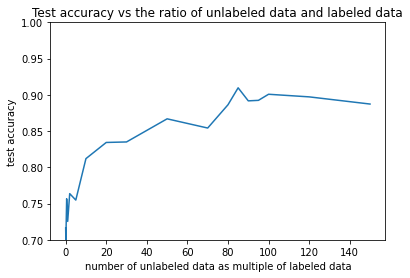

In [0]:
# plot test accuracy vs the ratio of unlabeled data and labeled data
import matplotlib.pyplot as plt
size_list_plot=np.array(size_list)
plt.plot(size_list_plot/100, acc_list)  
plt.title("Test accuracy vs the ratio of unlabeled data and labeled data")
plt.xlabel("number of unlabeled data as multiple of labeled data")
plt.ylabel("test accuracy")

plt.ylim(0.7, 1)
plt.show() 
print(acc_list)

In [0]:
# Find the best ratio of mnist dataset, select labeled_size=300
from __future__ import print_function

from keras.datasets import mnist
import keras
import random
from sklearn.metrics import accuracy_score
import numpy as np

from ladder_net import get_ladder_network_fc

inp_size = 28*28 # size of mnist dataset 
n_classes = 10 # number of classes
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, inp_size).astype('float32')/255
x_test  = x_test.reshape(10000,  inp_size).astype('float32')/255

y_train = keras.utils.to_categorical(y_train, n_classes)
y_test  = keras.utils.to_categorical(y_test,  n_classes)

idxs_label = range(x_train.shape[0])
idxs_unlabel = range(x_train.shape[0])
# size_list is the list of the size of unlabeled data
size_list=[1,10,30,100,150,300,600,1500,2100,3000,6000,9000,12000,15000,21000,22500,24000,25500,27000,28500,30000,33000,36000,39000,42000]
acc_list=[]
labeled_size=300
for unlabel_size in size_list:
  random.seed(0)
  idxs_label = np.random.choice(x_train.shape[0], labeled_size, replace=False)
  random.seed(1)
  idxs_unlabel = np.random.choice(x_train.shape[0], unlabel_size, replace=False)
  x_train_unlabeled = x_train[idxs_unlabel]
  y_train_unlabeled = y_train[idxs_unlabel]
  x_train_labeled   = x_train[idxs_label]
  y_train_labeled   = y_train[idxs_label]
  if unlabel_size>=labeled_size:
    n_rep = x_train_unlabeled.shape[0] // x_train_labeled.shape[0]
    x_train_labeled_rep = np.concatenate([x_train_labeled]*n_rep)
    y_train_labeled_rep = np.concatenate([y_train_labeled]*n_rep)
  else:
    n_rep = x_train_labeled.shape[0] // x_train_unlabeled.shape[0]
    x_train_unlabeled_rep = np.concatenate([x_train_unlabeled]*n_rep)
    y_train_unlabeled_rep = np.concatenate([y_train_unlabeled]*n_rep)
  
  model = get_ladder_network_fc(layer_sizes=[inp_size, 1000, 500, 250, 250, 250, n_classes])

  # train the model for 20 epochs
  for _ in range(20):
      if unlabel_size>=labeled_size:
        model.fit([x_train_labeled_rep, x_train_unlabeled], y_train_labeled_rep, epochs=1)
      else:
        model.fit([x_train_labeled, x_train_unlabeled_rep], y_train_labeled, epochs=1)
      y_test_pr = model.test_model.predict(x_test, batch_size=100)
      acc=accuracy_score(y_test.argmax(-1), y_test_pr.argmax(-1))
      print("Test accuracy : %f" % acc)
  acc_list.append(acc)

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Epoch 1/1
300/300 [==============================] - 7s 24ms/step - loss: 99.9130 - accuracy: 0.4133
Test accuracy : 0.725600
Epoch 1/1
 96/300 [========>.....................] - ETA: 0s - loss: 33.6577 - accuracy: 0.7396

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


300/300 [==============================] - 0s 1ms/step - loss: 23.2664 - accuracy: 0.6733
Test accuracy : 0.746000
Epoch 1/1
300/300 [==============================] - 0s 1ms/step - loss: 11.3220 - accuracy: 0.6900
Test accuracy : 0.779200
Epoch 1/1
300/300 [==============================] - 0s 1ms/step - loss: 9.6738 - accuracy: 0.6767
Test accuracy : 0.791800
Epoch 1/1
300/300 [==============================] - 0s 1ms/step - loss: 8.4062 - accuracy: 0.7167
Test accuracy : 0.799900
Epoch 1/1
300/300 [==============================] - 0s 1ms/step - loss: 7.1330 - accuracy: 0.7800
Test accuracy : 0.795700
Epoch 1/1
300/300 [==============================] - 0s 1ms/step - loss: 5.9714 - accuracy: 0.7700
Test accuracy : 0.801800
Epoch 1/1
300/300 [==============================] - 0s 1ms/step - loss: 5.0610 - accuracy: 0.7800
Test accuracy : 0.805000
Epoch 1/1
300/300 [==============================] - 0s 1ms/step - loss: 3.9966 - accuracy: 0.7833
Test accuracy : 0.811300
Epoch 1/1
300/30

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


300/300 [==============================] - 0s 1ms/step - loss: 17.9345 - accuracy: 0.6533
Test accuracy : 0.762500
Epoch 1/1
300/300 [==============================] - 0s 1ms/step - loss: 13.1826 - accuracy: 0.7467
Test accuracy : 0.786200
Epoch 1/1
300/300 [==============================] - 0s 1ms/step - loss: 11.3216 - accuracy: 0.7900
Test accuracy : 0.804000
Epoch 1/1
300/300 [==============================] - 0s 1ms/step - loss: 8.7012 - accuracy: 0.8033
Test accuracy : 0.812900
Epoch 1/1
300/300 [==============================] - 0s 1ms/step - loss: 7.0802 - accuracy: 0.8467
Test accuracy : 0.817200
Epoch 1/1
300/300 [==============================] - 0s 2ms/step - loss: 6.0577 - accuracy: 0.8267
Test accuracy : 0.813200
Epoch 1/1
300/300 [==============================] - 0s 2ms/step - loss: 5.9285 - accuracy: 0.8400
Test accuracy : 0.810900
Epoch 1/1
300/300 [==============================] - 0s 1ms/step - loss: 5.4250 - accuracy: 0.8700
Test accuracy : 0.795200
Epoch 1/1
300/3

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


300/300 [==============================] - 0s 1ms/step - loss: 22.5347 - accuracy: 0.7367
Test accuracy : 0.776100
Epoch 1/1
300/300 [==============================] - 0s 1ms/step - loss: 18.4179 - accuracy: 0.7667
Test accuracy : 0.821300
Epoch 1/1
300/300 [==============================] - 0s 1ms/step - loss: 15.5548 - accuracy: 0.8467
Test accuracy : 0.831000
Epoch 1/1
300/300 [==============================] - 0s 1ms/step - loss: 12.8631 - accuracy: 0.8600
Test accuracy : 0.845700
Epoch 1/1
300/300 [==============================] - 0s 1ms/step - loss: 10.8751 - accuracy: 0.8633
Test accuracy : 0.835800
Epoch 1/1
300/300 [==============================] - 0s 1ms/step - loss: 9.7341 - accuracy: 0.8600
Test accuracy : 0.843300
Epoch 1/1
300/300 [==============================] - 0s 1ms/step - loss: 8.7356 - accuracy: 0.8933
Test accuracy : 0.841800
Epoch 1/1
300/300 [==============================] - 0s 1ms/step - loss: 8.6867 - accuracy: 0.8700
Test accuracy : 0.844900
Epoch 1/1
300

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


300/300 [==============================] - 0s 2ms/step - loss: 27.3753 - accuracy: 0.6867
Test accuracy : 0.813000
Epoch 1/1
300/300 [==============================] - 0s 1ms/step - loss: 22.5135 - accuracy: 0.7600
Test accuracy : 0.832900
Epoch 1/1
300/300 [==============================] - 0s 1ms/step - loss: 20.0742 - accuracy: 0.8400
Test accuracy : 0.848600
Epoch 1/1
300/300 [==============================] - 0s 1ms/step - loss: 18.1377 - accuracy: 0.8633
Test accuracy : 0.833900
Epoch 1/1
300/300 [==============================] - 0s 2ms/step - loss: 16.6725 - accuracy: 0.9067
Test accuracy : 0.843500
Epoch 1/1
300/300 [==============================] - 0s 1ms/step - loss: 15.7790 - accuracy: 0.8933
Test accuracy : 0.853800
Epoch 1/1
300/300 [==============================] - 0s 1ms/step - loss: 15.2467 - accuracy: 0.9167
Test accuracy : 0.856300
Epoch 1/1
300/300 [==============================] - 0s 1ms/step - loss: 14.8837 - accuracy: 0.8833
Test accuracy : 0.867900
Epoch 1/1


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


300/300 [==============================] - 1s 2ms/step - loss: 27.6740 - accuracy: 0.7500
Test accuracy : 0.788100
Epoch 1/1
300/300 [==============================] - 1s 2ms/step - loss: 23.4615 - accuracy: 0.8533
Test accuracy : 0.799900
Epoch 1/1
300/300 [==============================] - 1s 2ms/step - loss: 20.8096 - accuracy: 0.8300
Test accuracy : 0.814900
Epoch 1/1
300/300 [==============================] - 1s 2ms/step - loss: 18.6602 - accuracy: 0.8800
Test accuracy : 0.832100
Epoch 1/1
300/300 [==============================] - 1s 2ms/step - loss: 17.4792 - accuracy: 0.8800
Test accuracy : 0.823500
Epoch 1/1
300/300 [==============================] - 1s 2ms/step - loss: 16.9911 - accuracy: 0.9067
Test accuracy : 0.824500
Epoch 1/1
300/300 [==============================] - 0s 2ms/step - loss: 16.2949 - accuracy: 0.9067
Test accuracy : 0.832900
Epoch 1/1
300/300 [==============================] - 1s 2ms/step - loss: 15.4701 - accuracy: 0.9133
Test accuracy : 0.839400
Epoch 1/1


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


300/300 [==============================] - 1s 2ms/step - loss: 29.3533 - accuracy: 0.7433
Test accuracy : 0.804900
Epoch 1/1
300/300 [==============================] - 1s 2ms/step - loss: 24.0507 - accuracy: 0.8233
Test accuracy : 0.808900
Epoch 1/1
300/300 [==============================] - 1s 2ms/step - loss: 21.6622 - accuracy: 0.8367
Test accuracy : 0.842400
Epoch 1/1
300/300 [==============================] - 1s 2ms/step - loss: 19.9454 - accuracy: 0.8500
Test accuracy : 0.856700
Epoch 1/1
300/300 [==============================] - 1s 2ms/step - loss: 18.7004 - accuracy: 0.9000
Test accuracy : 0.857900
Epoch 1/1
300/300 [==============================] - 1s 2ms/step - loss: 17.9903 - accuracy: 0.9300
Test accuracy : 0.853400
Epoch 1/1
300/300 [==============================] - 1s 2ms/step - loss: 17.3532 - accuracy: 0.9133
Test accuracy : 0.856400
Epoch 1/1
300/300 [==============================] - 1s 2ms/step - loss: 16.8692 - accuracy: 0.9200
Test accuracy : 0.852400
Epoch 1/1


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


600/600 [==============================] - 1s 2ms/step - loss: 23.5434 - accuracy: 0.8117
Test accuracy : 0.824600
Epoch 1/1
600/600 [==============================] - 1s 2ms/step - loss: 20.1809 - accuracy: 0.8650
Test accuracy : 0.849400
Epoch 1/1
600/600 [==============================] - 1s 2ms/step - loss: 18.4730 - accuracy: 0.8983
Test accuracy : 0.844000
Epoch 1/1
600/600 [==============================] - 1s 2ms/step - loss: 17.7299 - accuracy: 0.9233
Test accuracy : 0.842400
Epoch 1/1
600/600 [==============================] - 1s 2ms/step - loss: 17.0551 - accuracy: 0.9383
Test accuracy : 0.862800
Epoch 1/1
600/600 [==============================] - 1s 2ms/step - loss: 16.4953 - accuracy: 0.9533
Test accuracy : 0.853600
Epoch 1/1
600/600 [==============================] - 1s 2ms/step - loss: 16.0323 - accuracy: 0.9433
Test accuracy : 0.858900
Epoch 1/1
600/600 [==============================] - 1s 2ms/step - loss: 15.8774 - accuracy: 0.9150
Test accuracy : 0.858700
Epoch 1/1


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


1500/1500 [==============================] - 2s 2ms/step - loss: 18.8044 - accuracy: 0.9087
Test accuracy : 0.864300
Epoch 1/1
1500/1500 [==============================] - 2s 2ms/step - loss: 17.1830 - accuracy: 0.9220
Test accuracy : 0.866200
Epoch 1/1
1500/1500 [==============================] - 2s 2ms/step - loss: 16.0400 - accuracy: 0.9293
Test accuracy : 0.876300
Epoch 1/1
1500/1500 [==============================] - 2s 2ms/step - loss: 15.3564 - accuracy: 0.9487
Test accuracy : 0.878000
Epoch 1/1
1500/1500 [==============================] - 3s 2ms/step - loss: 14.8223 - accuracy: 0.9580
Test accuracy : 0.880500
Epoch 1/1
1500/1500 [==============================] - 2s 2ms/step - loss: 13.9991 - accuracy: 0.9613
Test accuracy : 0.884500
Epoch 1/1
1500/1500 [==============================] - 2s 1ms/step - loss: 13.5445 - accuracy: 0.9673
Test accuracy : 0.881600
Epoch 1/1
1500/1500 [==============================] - 2s 2ms/step - loss: 13.1605 - accuracy: 0.9647
Test accuracy : 0.8

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


2100/2100 [==============================] - 3s 1ms/step - loss: 18.1516 - accuracy: 0.9152
Test accuracy : 0.844200
Epoch 1/1
2100/2100 [==============================] - 3s 1ms/step - loss: 16.5719 - accuracy: 0.9424
Test accuracy : 0.839600
Epoch 1/1
2100/2100 [==============================] - 3s 1ms/step - loss: 15.4190 - accuracy: 0.9481
Test accuracy : 0.861200
Epoch 1/1
2100/2100 [==============================] - 3s 2ms/step - loss: 14.6093 - accuracy: 0.9519
Test accuracy : 0.861500
Epoch 1/1
2100/2100 [==============================] - 3s 1ms/step - loss: 13.7284 - accuracy: 0.9633
Test accuracy : 0.873900
Epoch 1/1
2100/2100 [==============================] - 3s 1ms/step - loss: 13.3740 - accuracy: 0.9695
Test accuracy : 0.870300
Epoch 1/1
2100/2100 [==============================] - 3s 1ms/step - loss: 12.9332 - accuracy: 0.9748
Test accuracy : 0.853500
Epoch 1/1
2100/2100 [==============================] - 3s 1ms/step - loss: 12.6048 - accuracy: 0.9657
Test accuracy : 0.8

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


3000/3000 [==============================] - 4s 1ms/step - loss: 17.1214 - accuracy: 0.9340
Test accuracy : 0.861000
Epoch 1/1
3000/3000 [==============================] - 4s 1ms/step - loss: 15.5416 - accuracy: 0.9373
Test accuracy : 0.853400
Epoch 1/1
3000/3000 [==============================] - 4s 1ms/step - loss: 14.1967 - accuracy: 0.9547
Test accuracy : 0.872300
Epoch 1/1
3000/3000 [==============================] - 4s 1ms/step - loss: 13.3369 - accuracy: 0.9713
Test accuracy : 0.868600
Epoch 1/1
3000/3000 [==============================] - 4s 1ms/step - loss: 12.8526 - accuracy: 0.9703
Test accuracy : 0.878900
Epoch 1/1
3000/3000 [==============================] - 4s 1ms/step - loss: 12.4167 - accuracy: 0.9723
Test accuracy : 0.876000
Epoch 1/1
3000/3000 [==============================] - 4s 1ms/step - loss: 12.1231 - accuracy: 0.9773
Test accuracy : 0.890200
Epoch 1/1
3000/3000 [==============================] - 4s 1ms/step - loss: 11.9137 - accuracy: 0.9833
Test accuracy : 0.8

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


6000/6000 [==============================] - 9s 2ms/step - loss: 14.9526 - accuracy: 0.9618
Test accuracy : 0.878600
Epoch 1/1
6000/6000 [==============================] - 9s 2ms/step - loss: 13.3463 - accuracy: 0.9665
Test accuracy : 0.871400
Epoch 1/1
6000/6000 [==============================] - 9s 1ms/step - loss: 12.5620 - accuracy: 0.9733
Test accuracy : 0.880200
Epoch 1/1
6000/6000 [==============================] - 9s 1ms/step - loss: 12.0636 - accuracy: 0.9795
Test accuracy : 0.894000
Epoch 1/1
6000/6000 [==============================] - 9s 1ms/step - loss: 11.7308 - accuracy: 0.9817
Test accuracy : 0.891000
Epoch 1/1
6000/6000 [==============================] - 9s 1ms/step - loss: 11.6496 - accuracy: 0.9818
Test accuracy : 0.888800
Epoch 1/1
6000/6000 [==============================] - 9s 1ms/step - loss: 11.4255 - accuracy: 0.9832
Test accuracy : 0.901500
Epoch 1/1
6000/6000 [==============================] - 9s 1ms/step - loss: 11.2891 - accuracy: 0.9887
Test accuracy : 0.9

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


9000/9000 [==============================] - 13s 1ms/step - loss: 13.6535 - accuracy: 0.9616
Test accuracy : 0.876800
Epoch 1/1
9000/9000 [==============================] - 13s 1ms/step - loss: 12.4173 - accuracy: 0.9718
Test accuracy : 0.891600
Epoch 1/1
9000/9000 [==============================] - 13s 1ms/step - loss: 11.7485 - accuracy: 0.9812
Test accuracy : 0.880000
Epoch 1/1
9000/9000 [==============================] - 13s 1ms/step - loss: 11.4486 - accuracy: 0.9828
Test accuracy : 0.879600
Epoch 1/1
9000/9000 [==============================] - 13s 1ms/step - loss: 11.2931 - accuracy: 0.9854
Test accuracy : 0.894200
Epoch 1/1
9000/9000 [==============================] - 13s 1ms/step - loss: 11.0997 - accuracy: 0.9856
Test accuracy : 0.892100
Epoch 1/1
9000/9000 [==============================] - 13s 1ms/step - loss: 11.0027 - accuracy: 0.9841
Test accuracy : 0.907800
Epoch 1/1
9000/9000 [==============================] - 14s 2ms/step - loss: 10.9110 - accuracy: 0.9866
Test accura

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


12000/12000 [==============================] - 18s 1ms/step - loss: 12.9548 - accuracy: 0.9703
Test accuracy : 0.885100
Epoch 1/1
12000/12000 [==============================] - 18s 1ms/step - loss: 11.8769 - accuracy: 0.9760
Test accuracy : 0.894700
Epoch 1/1
12000/12000 [==============================] - 18s 2ms/step - loss: 11.4666 - accuracy: 0.9808
Test accuracy : 0.901100
Epoch 1/1
12000/12000 [==============================] - 18s 1ms/step - loss: 11.2302 - accuracy: 0.9832
Test accuracy : 0.905200
Epoch 1/1
12000/12000 [==============================] - 18s 1ms/step - loss: 11.0282 - accuracy: 0.9864
Test accuracy : 0.903800
Epoch 1/1
12000/12000 [==============================] - 18s 1ms/step - loss: 10.8424 - accuracy: 0.9885
Test accuracy : 0.909800
Epoch 1/1
12000/12000 [==============================] - 18s 1ms/step - loss: 10.8085 - accuracy: 0.9880
Test accuracy : 0.912300
Epoch 1/1
12000/12000 [==============================] - 18s 1ms/step - loss: 10.6745 - accuracy: 0.

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


15000/15000 [==============================] - 22s 1ms/step - loss: 12.4019 - accuracy: 0.9729
Test accuracy : 0.901900
Epoch 1/1
15000/15000 [==============================] - 22s 1ms/step - loss: 11.5529 - accuracy: 0.9797
Test accuracy : 0.908700
Epoch 1/1
15000/15000 [==============================] - 22s 1ms/step - loss: 11.1899 - accuracy: 0.9825
Test accuracy : 0.919400
Epoch 1/1
15000/15000 [==============================] - 22s 1ms/step - loss: 10.9509 - accuracy: 0.9859
Test accuracy : 0.920700
Epoch 1/1
15000/15000 [==============================] - 22s 1ms/step - loss: 10.8222 - accuracy: 0.9857
Test accuracy : 0.924800
Epoch 1/1
15000/15000 [==============================] - 22s 1ms/step - loss: 10.6430 - accuracy: 0.9889
Test accuracy : 0.921800
Epoch 1/1
15000/15000 [==============================] - 22s 1ms/step - loss: 10.5502 - accuracy: 0.9895
Test accuracy : 0.926100
Epoch 1/1
15000/15000 [==============================] - 22s 1ms/step - loss: 10.3948 - accuracy: 0.

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


21000/21000 [==============================] - 31s 1ms/step - loss: 11.9109 - accuracy: 0.9800
Test accuracy : 0.885200
Epoch 1/1
21000/21000 [==============================] - 31s 1ms/step - loss: 11.2190 - accuracy: 0.9844
Test accuracy : 0.893800
Epoch 1/1
21000/21000 [==============================] - 31s 1ms/step - loss: 10.9594 - accuracy: 0.9854
Test accuracy : 0.905200
Epoch 1/1
21000/21000 [==============================] - 31s 1ms/step - loss: 10.7740 - accuracy: 0.9901
Test accuracy : 0.899500
Epoch 1/1
21000/21000 [==============================] - 31s 1ms/step - loss: 10.6036 - accuracy: 0.9902
Test accuracy : 0.913700
Epoch 1/1
21000/21000 [==============================] - 31s 1ms/step - loss: 10.4380 - accuracy: 0.9894
Test accuracy : 0.916000
Epoch 1/1
21000/21000 [==============================] - 31s 1ms/step - loss: 10.3286 - accuracy: 0.9915
Test accuracy : 0.916500
Epoch 1/1
21000/21000 [==============================] - 31s 1ms/step - loss: 10.2699 - accuracy: 0.

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


22500/22500 [==============================] - 33s 1ms/step - loss: 11.8969 - accuracy: 0.9769
Test accuracy : 0.893600
Epoch 1/1
22500/22500 [==============================] - 34s 1ms/step - loss: 11.2744 - accuracy: 0.9833
Test accuracy : 0.898600
Epoch 1/1
22500/22500 [==============================] - 33s 1ms/step - loss: 10.9800 - accuracy: 0.9848
Test accuracy : 0.905900
Epoch 1/1
22500/22500 [==============================] - 34s 2ms/step - loss: 10.7939 - accuracy: 0.9863
Test accuracy : 0.910700
Epoch 1/1
22500/22500 [==============================] - 35s 2ms/step - loss: 10.5892 - accuracy: 0.9888
Test accuracy : 0.919900
Epoch 1/1
22500/22500 [==============================] - 35s 2ms/step - loss: 10.4672 - accuracy: 0.9892
Test accuracy : 0.917100
Epoch 1/1
22500/22500 [==============================] - 34s 2ms/step - loss: 10.3384 - accuracy: 0.9907
Test accuracy : 0.930200
Epoch 1/1
22500/22500 [==============================] - 34s 1ms/step - loss: 10.2566 - accuracy: 0.

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


24000/24000 [==============================] - 37s 2ms/step - loss: 11.7566 - accuracy: 0.9773
Test accuracy : 0.902100
Epoch 1/1
24000/24000 [==============================] - 37s 2ms/step - loss: 11.1703 - accuracy: 0.9835
Test accuracy : 0.912900
Epoch 1/1
24000/24000 [==============================] - 37s 2ms/step - loss: 10.8966 - accuracy: 0.9867
Test accuracy : 0.917600
Epoch 1/1
24000/24000 [==============================] - 37s 2ms/step - loss: 10.6727 - accuracy: 0.9890
Test accuracy : 0.922300
Epoch 1/1
24000/24000 [==============================] - 38s 2ms/step - loss: 10.4920 - accuracy: 0.9894
Test accuracy : 0.927900
Epoch 1/1
24000/24000 [==============================] - 38s 2ms/step - loss: 10.3714 - accuracy: 0.9899
Test accuracy : 0.931900
Epoch 1/1
24000/24000 [==============================] - 37s 2ms/step - loss: 10.2650 - accuracy: 0.9900
Test accuracy : 0.929100
Epoch 1/1
24000/24000 [==============================] - 39s 2ms/step - loss: 10.1556 - accuracy: 0.

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


25500/25500 [==============================] - 39s 2ms/step - loss: 11.6038 - accuracy: 0.9810
Test accuracy : 0.890600
Epoch 1/1
25500/25500 [==============================] - 40s 2ms/step - loss: 11.0685 - accuracy: 0.9851
Test accuracy : 0.902400
Epoch 1/1
25500/25500 [==============================] - 39s 2ms/step - loss: 10.7896 - accuracy: 0.9872
Test accuracy : 0.908800
Epoch 1/1
25500/25500 [==============================] - 40s 2ms/step - loss: 10.5921 - accuracy: 0.9896
Test accuracy : 0.917200
Epoch 1/1
25500/25500 [==============================] - 39s 2ms/step - loss: 10.4045 - accuracy: 0.9891
Test accuracy : 0.928300
Epoch 1/1
25500/25500 [==============================] - 40s 2ms/step - loss: 10.3160 - accuracy: 0.9898
Test accuracy : 0.923100
Epoch 1/1
25500/25500 [==============================] - 40s 2ms/step - loss: 10.1880 - accuracy: 0.9907
Test accuracy : 0.929700
Epoch 1/1
25500/25500 [==============================] - 40s 2ms/step - loss: 10.0871 - accuracy: 0.

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


27000/27000 [==============================] - 43s 2ms/step - loss: 11.4766 - accuracy: 0.9819
Test accuracy : 0.907400
Epoch 1/1
27000/27000 [==============================] - 44s 2ms/step - loss: 10.9940 - accuracy: 0.9848
Test accuracy : 0.920100
Epoch 1/1
27000/27000 [==============================] - 43s 2ms/step - loss: 10.7320 - accuracy: 0.9880
Test accuracy : 0.918400
Epoch 1/1
27000/27000 [==============================] - 43s 2ms/step - loss: 10.5400 - accuracy: 0.9897
Test accuracy : 0.926700
Epoch 1/1
27000/27000 [==============================] - 43s 2ms/step - loss: 10.3570 - accuracy: 0.9903
Test accuracy : 0.927800
Epoch 1/1
27000/27000 [==============================] - 43s 2ms/step - loss: 10.2250 - accuracy: 0.9910
Test accuracy : 0.930300
Epoch 1/1
27000/27000 [==============================] - 43s 2ms/step - loss: 10.1444 - accuracy: 0.9916
Test accuracy : 0.941900
Epoch 1/1
27000/27000 [==============================] - 43s 2ms/step - loss: 10.0154 - accuracy: 0.

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


28500/28500 [==============================] - 46s 2ms/step - loss: 11.5108 - accuracy: 0.9824
Test accuracy : 0.908200
Epoch 1/1
28500/28500 [==============================] - 45s 2ms/step - loss: 10.9925 - accuracy: 0.9854
Test accuracy : 0.921400
Epoch 1/1
28500/28500 [==============================] - 45s 2ms/step - loss: 10.7098 - accuracy: 0.9880
Test accuracy : 0.927100
Epoch 1/1
28500/28500 [==============================] - 45s 2ms/step - loss: 10.4851 - accuracy: 0.9891
Test accuracy : 0.927400
Epoch 1/1
28500/28500 [==============================] - 45s 2ms/step - loss: 10.3265 - accuracy: 0.9909
Test accuracy : 0.937300
Epoch 1/1
28500/28500 [==============================] - 45s 2ms/step - loss: 10.1933 - accuracy: 0.9910
Test accuracy : 0.933600
Epoch 1/1
28500/28500 [==============================] - 45s 2ms/step - loss: 10.0921 - accuracy: 0.9914
Test accuracy : 0.946800
Epoch 1/1
28500/28500 [==============================] - 46s 2ms/step - loss: 9.9843 - accuracy: 0.9

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


30000/30000 [==============================] - 48s 2ms/step - loss: 11.5040 - accuracy: 0.9833
Test accuracy : 0.919200
Epoch 1/1
30000/30000 [==============================] - 49s 2ms/step - loss: 11.0178 - accuracy: 0.9867
Test accuracy : 0.919200
Epoch 1/1
30000/30000 [==============================] - 48s 2ms/step - loss: 10.6727 - accuracy: 0.9877
Test accuracy : 0.919600
Epoch 1/1
30000/30000 [==============================] - 48s 2ms/step - loss: 10.4909 - accuracy: 0.9903
Test accuracy : 0.929300
Epoch 1/1
30000/30000 [==============================] - 48s 2ms/step - loss: 10.3240 - accuracy: 0.9914
Test accuracy : 0.937900
Epoch 1/1
30000/30000 [==============================] - 48s 2ms/step - loss: 10.1734 - accuracy: 0.9920
Test accuracy : 0.945100
Epoch 1/1
30000/30000 [==============================] - 48s 2ms/step - loss: 10.0790 - accuracy: 0.9922
Test accuracy : 0.941900
Epoch 1/1
30000/30000 [==============================] - 48s 2ms/step - loss: 9.9623 - accuracy: 0.9

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


33000/33000 [==============================] - 58s 2ms/step - loss: 11.3237 - accuracy: 0.9830
Test accuracy : 0.915800
Epoch 1/1
33000/33000 [==============================] - 53s 2ms/step - loss: 10.8785 - accuracy: 0.9858
Test accuracy : 0.928000
Epoch 1/1
33000/33000 [==============================] - 54s 2ms/step - loss: 10.5871 - accuracy: 0.9882
Test accuracy : 0.929600
Epoch 1/1
33000/33000 [==============================] - 56s 2ms/step - loss: 10.3637 - accuracy: 0.9888
Test accuracy : 0.938600
Epoch 1/1
33000/33000 [==============================] - 54s 2ms/step - loss: 10.2196 - accuracy: 0.9909
Test accuracy : 0.942700
Epoch 1/1
33000/33000 [==============================] - 53s 2ms/step - loss: 10.1144 - accuracy: 0.9906
Test accuracy : 0.945300
Epoch 1/1
33000/33000 [==============================] - 54s 2ms/step - loss: 9.9923 - accuracy: 0.9919
Test accuracy : 0.943900
Epoch 1/1
33000/33000 [==============================] - 54s 2ms/step - loss: 9.9366 - accuracy: 0.99

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


36000/36000 [==============================] - 59s 2ms/step - loss: 11.2969 - accuracy: 0.9824
Test accuracy : 0.910300
Epoch 1/1
36000/36000 [==============================] - 60s 2ms/step - loss: 10.7971 - accuracy: 0.9860
Test accuracy : 0.911100
Epoch 1/1
36000/36000 [==============================] - 58s 2ms/step - loss: 10.5397 - accuracy: 0.9887
Test accuracy : 0.929100
Epoch 1/1
36000/36000 [==============================] - 58s 2ms/step - loss: 10.3471 - accuracy: 0.9909
Test accuracy : 0.930800
Epoch 1/1
36000/36000 [==============================] - 58s 2ms/step - loss: 10.1776 - accuracy: 0.9908
Test accuracy : 0.930200
Epoch 1/1
36000/36000 [==============================] - 57s 2ms/step - loss: 10.0555 - accuracy: 0.9918
Test accuracy : 0.938100
Epoch 1/1
36000/36000 [==============================] - 58s 2ms/step - loss: 9.9707 - accuracy: 0.9924
Test accuracy : 0.941600
Epoch 1/1
36000/36000 [==============================] - 58s 2ms/step - loss: 9.8601 - accuracy: 0.99

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


39000/39000 [==============================] - 63s 2ms/step - loss: 11.2058 - accuracy: 0.9841
Test accuracy : 0.919800
Epoch 1/1
39000/39000 [==============================] - 63s 2ms/step - loss: 10.7658 - accuracy: 0.9881
Test accuracy : 0.937200
Epoch 1/1
39000/39000 [==============================] - 63s 2ms/step - loss: 10.5081 - accuracy: 0.9901
Test accuracy : 0.938600
Epoch 1/1
39000/39000 [==============================] - 63s 2ms/step - loss: 10.2673 - accuracy: 0.9897
Test accuracy : 0.941400
Epoch 1/1
39000/39000 [==============================] - 63s 2ms/step - loss: 10.1558 - accuracy: 0.9922
Test accuracy : 0.942300
Epoch 1/1
39000/39000 [==============================] - 63s 2ms/step - loss: 9.9626 - accuracy: 0.9930
Test accuracy : 0.947500
Epoch 1/1
39000/39000 [==============================] - 63s 2ms/step - loss: 9.8982 - accuracy: 0.9934
Test accuracy : 0.945400
Epoch 1/1
39000/39000 [==============================] - 63s 2ms/step - loss: 9.7840 - accuracy: 0.994

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


42000/42000 [==============================] - 71s 2ms/step - loss: 11.0986 - accuracy: 0.9846
Test accuracy : 0.917900
Epoch 1/1
42000/42000 [==============================] - 71s 2ms/step - loss: 10.6804 - accuracy: 0.9869
Test accuracy : 0.922900
Epoch 1/1
42000/42000 [==============================] - 70s 2ms/step - loss: 10.4081 - accuracy: 0.9896
Test accuracy : 0.923800
Epoch 1/1
42000/42000 [==============================] - 69s 2ms/step - loss: 10.2162 - accuracy: 0.9907
Test accuracy : 0.931300
Epoch 1/1
42000/42000 [==============================] - 70s 2ms/step - loss: 10.0917 - accuracy: 0.9923
Test accuracy : 0.935000
Epoch 1/1
42000/42000 [==============================] - 69s 2ms/step - loss: 9.9055 - accuracy: 0.9926
Test accuracy : 0.941700
Epoch 1/1
42000/42000 [==============================] - 71s 2ms/step - loss: 9.8049 - accuracy: 0.9936
Test accuracy : 0.944800
Epoch 1/1
42000/42000 [==============================] - 70s 2ms/step - loss: 9.7111 - accuracy: 0.994

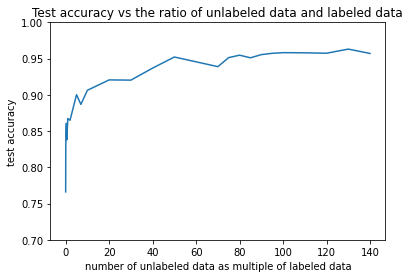

[0.7661, 0.812, 0.8437, 0.8607, 0.8379, 0.8674, 0.8649, 0.9002, 0.8868, 0.9063, 0.9206, 0.9203, 0.9369, 0.9522, 0.9389, 0.9514, 0.9547, 0.9511, 0.9555, 0.9573, 0.9582, 0.958, 0.9574, 0.9631, 0.9571]


In [0]:
# plot test accuracy vs the ratio of unlabeled data and labeled data
import matplotlib.pyplot as plt
size_list_plot=np.array(size_list)
plt.plot(size_list_plot/300, acc_list)  
plt.title("Test accuracy vs the ratio of unlabeled data and labeled data")
plt.xlabel("number of unlabeled data as multiple of labeled data")
plt.ylabel("test accuracy")

plt.ylim(0.7, 1)
plt.show() 
print(acc_list)